# Step - 1: Reading and Understanding the Data

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("telecom_churn_data.csv")
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [3]:
df.shape

(99999, 226)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000  ...  99999.000000  25153.000000  25571.000000   
mean     132.395875  ...      0.084581      0.914404      0.908764   
std      297.207406  ...      0.650457      0.279772      0.287950   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        7.380000  ...      0.000000      1.000000      1.000000   
50%       34.310000  ...      0.000000      1.000000      1.000000   
75%      118.740000  ...      0.000000      1.000000      1.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

In [6]:
null_values = {}
for col in df.columns:
    null_values[col] = df[col].isnull().sum()

null_values

{'mobile_number': 0,
 'circle_id': 0,
 'loc_og_t2o_mou': 1018,
 'std_og_t2o_mou': 1018,
 'loc_ic_t2o_mou': 1018,
 'last_date_of_month_6': 0,
 'last_date_of_month_7': 601,
 'last_date_of_month_8': 1100,
 'last_date_of_month_9': 1659,
 'arpu_6': 0,
 'arpu_7': 0,
 'arpu_8': 0,
 'arpu_9': 0,
 'onnet_mou_6': 3937,
 'onnet_mou_7': 3859,
 'onnet_mou_8': 5378,
 'onnet_mou_9': 7745,
 'offnet_mou_6': 3937,
 'offnet_mou_7': 3859,
 'offnet_mou_8': 5378,
 'offnet_mou_9': 7745,
 'roam_ic_mou_6': 3937,
 'roam_ic_mou_7': 3859,
 'roam_ic_mou_8': 5378,
 'roam_ic_mou_9': 7745,
 'roam_og_mou_6': 3937,
 'roam_og_mou_7': 3859,
 'roam_og_mou_8': 5378,
 'roam_og_mou_9': 7745,
 'loc_og_t2t_mou_6': 3937,
 'loc_og_t2t_mou_7': 3859,
 'loc_og_t2t_mou_8': 5378,
 'loc_og_t2t_mou_9': 7745,
 'loc_og_t2m_mou_6': 3937,
 'loc_og_t2m_mou_7': 3859,
 'loc_og_t2m_mou_8': 5378,
 'loc_og_t2m_mou_9': 7745,
 'loc_og_t2f_mou_6': 3937,
 'loc_og_t2f_mou_7': 3859,
 'loc_og_t2f_mou_8': 5378,
 'loc_og_t2f_mou_9': 7745,
 'loc_og_t2c_mo

There are many columns with null values which needed to be handled.

# Step - 2: Exploratory Data Analysis

## Handling Null Values

### Deleting columns with high null value percentage

In [7]:
null_values_percentage = {}
for key, value in null_values.items():
    null_values_percentage[key] = (value/df.shape[0])*100

null_values_percentage = pd.DataFrame(null_values_percentage, index=["Percentage"])
null_values_percentage = null_values_percentage.T
null_values_percentage = null_values_percentage.sort_values(by="Percentage", ascending=False)
null_values_percentage

Percentage
arpu_3g_6           74.846748
night_pck_user_6    74.846748
total_rech_data_6   74.846748
arpu_2g_6           74.846748
max_rech_data_6     74.846748
...                       ...
max_rech_amt_7       0.000000
max_rech_amt_6       0.000000
total_rech_amt_9     0.000000
total_rech_amt_8     0.000000
sep_vbc_3g           0.000000

[226 rows x 1 columns]

There are many columns with null values around 75%. Next number of columns with more than 35% null values are checked.

In [8]:
list_of_columns_to_drop = null_values_percentage[null_values_percentage["Percentage"] > 35].index.tolist()
print(len(list_of_columns_to_drop))
list_of_columns_to_drop

40


['arpu_3g_6',
 'night_pck_user_6',
 'total_rech_data_6',
 'arpu_2g_6',
 'max_rech_data_6',
 'fb_user_6',
 'av_rech_amt_data_6',
 'date_of_last_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'fb_user_7',
 'max_rech_data_7',
 'night_pck_user_7',
 'count_rech_2g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'total_rech_data_9',
 'count_rech_3g_9',
 'fb_user_9',
 'max_rech_data_9',
 'arpu_3g_9',
 'date_of_last_rech_data_9',
 'night_pck_user_9',
 'arpu_2g_9',
 'count_rech_2g_9',
 'av_rech_amt_data_9',
 'total_rech_data_8',
 'arpu_3g_8',
 'fb_user_8',
 'night_pck_user_8',
 'av_rech_amt_data_8',
 'max_rech_data_8',
 'count_rech_3g_8',
 'arpu_2g_8',
 'count_rech_2g_8',
 'date_of_last_rech_data_8']

There are 40 columns which have null value percentage more than 35%. So, all those columns are dropped as it is high percentage of missing values.

In [9]:
df.drop(columns=list_of_columns_to_drop, inplace=True)
df.shape

(99999, 186)

After dropping those 40 columns with null values percentage more than 35%, total number of columns are 186. 

## Dropping columns

### Checking all columns with single value repeated in dataset

In [10]:
columns_with_one_unique_value = []
for col in df.columns:
    if df[col].nunique() == 1:
        columns_with_one_unique_value.append(col)

print(len(columns_with_one_unique_value))

16


In [11]:
columns_with_one_unique_value

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

There are 16 columns which has only 1 value for all the records in the dataset. So, it doesn't hold any significance for the model building. So, all those columns are dropped. 

In [12]:
df.drop(columns=columns_with_one_unique_value, inplace=True)
df.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100          NaN   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  ...  monthly_3g_9  \
0          NaN         0.00          NaN           NaN  ...             0   
1        78.68         7.68        18.34         15.74  ...             0   
2        55.24        37.26        74.81        143.33  ...             0   
3        54.39       310.98       241.71        123.31  ...             0   
4       149.44        83.89        58.78         76.96  ...             0   

   sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9   aon  aug_vbc_3g  \
0            0            0            0            0   968        30.4   
1            0            0            0            0  1006         0.0   
2            0            0            0            0  1103         0.0   
3            0            0            0            0  2491         0.0   
4            0            0            0            0  1526         0.0   

   jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0         0.0      101.20        3.58  
1         0.0        0.00        0.00  
2         0.0        4.17        0.00  
3         0.0        0.00        0.00  
4         0.0        0.00        0.00  

[5 rows x 170 columns]

### Date of last reach column 

Checking 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8' and 'date_of_last_rech_9' columns

In [13]:
date_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
for col in date_columns:
    print(f"{col}: {df[col].nunique()}")

date_of_last_rech_6: 30
date_of_last_rech_7: 31
date_of_last_rech_8: 31
date_of_last_rech_9: 30


There are 30 and 31 unique values in date of last reach column based on number of days in a month. And the date columns are deleted because it is not required in the analysis

In [14]:
df.drop(columns=date_columns, inplace=True)

In [15]:
df.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100          NaN   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  ...  monthly_3g_9  \
0          NaN         0.00          NaN           NaN  ...             0   
1        78.68         7.68        18.34         15.74  ...             0   
2        55.24        37.26        74.81        143.33  ...             0   
3        54.39       310.98       241.71        123.31  ...             0   
4       149.44        83.89        58.78         76.96  ...             0   

   sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9   aon  aug_vbc_3g  \
0            0            0            0            0   968        30.4   
1            0            0            0            0  1006         0.0   
2            0            0            0            0  1103         0.0   
3            0            0            0            0  2491         0.0   
4            0            0            0            0  1526         0.0   

   jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0         0.0      101.20        3.58  
1         0.0        0.00        0.00  
2         0.0        4.17        0.00  
3         0.0        0.00        0.00  
4         0.0        0.00        0.00  

[5 rows x 166 columns]

## Getting high-value customers using derived variable

Main objective is identiying the high value customers likely to churn which is calculated based on 70th percentile value of total recharge amount from June and July

In [16]:
# Calculating average recharge amount for June and July month
df['average_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7']) / 2 
df["average_rech_amt_6_7"].head()

0    307.0
1    229.0
2    241.5
3    270.0
4    273.0
Name: average_rech_amt_6_7, dtype: float64

In [17]:
cutoff_value = df["average_rech_amt_6_7"].quantile(0.7)
cutoff_value

368.5

70% percentile average value of recharge is 368.5. So, high value customers are the ones for whom the average amount is more than 368.5.

In [18]:
df = df[df["average_rech_amt_6_7"] >= cutoff_value]
df.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
7      7000701601  1069.180  1349.850  3171.480  500.000        57.84   
8      7001524846   378.721   492.223   137.362  166.787       413.69   
13     7002191713   492.846   205.671   593.260  322.732       501.76   
16     7000875565   430.975   299.869   187.894  206.490        50.51   
17     7000187447   690.008    18.980    25.499  257.583      1185.91   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  ...  sachet_3g_6  \
7         54.68        52.29          NaN        453.43  ...            0   
8        351.03        35.08        33.46         94.66  ...            0   
13       108.39       534.24       244.81        413.31  ...            0   
16        74.01        70.61        31.34        296.29  ...            0   
17         9.28         7.79       558.51         61.64  ...            0   

    sachet_3g_7  sachet_3g_8  sachet_3g_9   aon  aug_vbc_3g  jul_vbc_3g  \
7             0            0            0   802       57.74       19.38   
8             0            0            0   315       21.03      910.65   
13            0            0            0  2607        0.00        0.00   
16            0            0            0   511        0.00        2.45   
17            0            0            0   667        0.00        0.00   

    jun_vbc_3g  sep_vbc_3g  average_rech_amt_6_7  
7        18.74         0.0                1185.0  
8       122.16         0.0                 519.0  
13        0.00         0.0                 380.0  
16       21.89         0.0                 459.0  
17        0.00         0.0                 408.0  

[5 rows x 167 columns]

In [19]:
df.shape

(30011, 167)

After selecting high value customers with 70% percentile value, close to 30 thousand records are left from more than 99 thousand records.

## Null Values treatment

### Handling missing values row-wise

In [20]:
# Counting number of rows with missing values greater than 50%
df_null_rows_50 = df[(df.isnull().sum(axis=1)) > (len(df.columns)*0.5)]
df_null_rows_50.shape

(114, 167)

There are very few records for which the number of missing value is more than 50% compared to size of the dataset. So, all those records are dropped.

In [21]:
df.drop(index=df_null_rows_50.index, inplace=True)
df.shape

(29897, 167)

### Handling missing value column-wise

In [22]:
# Checking percentage of missing values in each column and storing it in a dataframe
null_values = {}
for col in df.columns:
    null_values[col] = df[col].isnull().sum()

null_values

{'mobile_number': 0,
 'arpu_6': 0,
 'arpu_7': 0,
 'arpu_8': 0,
 'arpu_9': 0,
 'onnet_mou_6': 202,
 'onnet_mou_7': 189,
 'onnet_mou_8': 824,
 'onnet_mou_9': 1590,
 'offnet_mou_6': 202,
 'offnet_mou_7': 189,
 'offnet_mou_8': 824,
 'offnet_mou_9': 1590,
 'roam_ic_mou_6': 202,
 'roam_ic_mou_7': 189,
 'roam_ic_mou_8': 824,
 'roam_ic_mou_9': 1590,
 'roam_og_mou_6': 202,
 'roam_og_mou_7': 189,
 'roam_og_mou_8': 824,
 'roam_og_mou_9': 1590,
 'loc_og_t2t_mou_6': 202,
 'loc_og_t2t_mou_7': 189,
 'loc_og_t2t_mou_8': 824,
 'loc_og_t2t_mou_9': 1590,
 'loc_og_t2m_mou_6': 202,
 'loc_og_t2m_mou_7': 189,
 'loc_og_t2m_mou_8': 824,
 'loc_og_t2m_mou_9': 1590,
 'loc_og_t2f_mou_6': 202,
 'loc_og_t2f_mou_7': 189,
 'loc_og_t2f_mou_8': 824,
 'loc_og_t2f_mou_9': 1590,
 'loc_og_t2c_mou_6': 202,
 'loc_og_t2c_mou_7': 189,
 'loc_og_t2c_mou_8': 824,
 'loc_og_t2c_mou_9': 1590,
 'loc_og_mou_6': 202,
 'loc_og_mou_7': 189,
 'loc_og_mou_8': 824,
 'loc_og_mou_9': 1590,
 'std_og_t2t_mou_6': 202,
 'std_og_t2t_mou_7': 189,
 '

For all different kind of mou data, number of missing values are same for all the columns. So, there is a need to check if those values are missing simlutaneously in all the records or not.

### MOU value for Month 6 (JUNE)

There are 202 missing values for June month. So, all MOU columns are obtained using this value.

In [23]:
df_missing_mou_6 = df[(df['onnet_mou_6'].isnull()) & (df['onnet_mou_6'].isnull()) & (df['roam_ic_mou_6'].isnull()) & (df['roam_og_mou_6'].isnull()) &
  (df['loc_og_t2t_mou_6'].isnull()) & (df['loc_og_t2m_mou_6'].isnull()) & (df['loc_og_t2f_mou_6'].isnull()) & (df['loc_og_t2c_mou_6'].isnull()) &
  (df['loc_og_mou_6'].isnull()) & (df['std_og_t2t_mou_6'].isnull()) & (df['std_og_t2m_mou_6'].isnull()) & (df['std_og_t2f_mou_6'].isnull()) &
  (df['std_og_mou_6'].isnull()) & (df['isd_og_mou_6'].isnull()) & (df['spl_og_mou_6'].isnull()) & (df['og_others_6'].isnull()) & 
  (df['loc_ic_t2t_mou_6'].isnull()) & (df['loc_ic_t2m_mou_6'].isnull()) & (df['loc_ic_t2f_mou_6'].isnull()) & (df['loc_ic_mou_6'].isnull()) & 
  (df['std_ic_t2t_mou_6'].isnull()) & (df['std_ic_t2m_mou_6'].isnull()) & (df['std_ic_t2f_mou_6'].isnull()) & (df['std_ic_mou_6'].isnull()) & 
  (df['spl_ic_mou_6'].isnull()) & (df['isd_ic_mou_6'].isnull()) & (df['ic_others_6'].isnull()) ]

df_missing_mou_6.shape

(202, 167)

It is clear from the shape of the dataframe that all records are missed at simultaneously for 6th month. So, all those records are dropped rather than imputing it as number of records are smaller compared to the size of the dataset.

In [24]:
df.drop(index=df_missing_mou_6.index, inplace=True)
df.shape

(29695, 167)

In [25]:
null_values = {}
for col in df.columns:
    null_values[col] = df[col].isnull().sum()

null_values

{'mobile_number': 0,
 'arpu_6': 0,
 'arpu_7': 0,
 'arpu_8': 0,
 'arpu_9': 0,
 'onnet_mou_6': 0,
 'onnet_mou_7': 163,
 'onnet_mou_8': 791,
 'onnet_mou_9': 1529,
 'offnet_mou_6': 0,
 'offnet_mou_7': 163,
 'offnet_mou_8': 791,
 'offnet_mou_9': 1529,
 'roam_ic_mou_6': 0,
 'roam_ic_mou_7': 163,
 'roam_ic_mou_8': 791,
 'roam_ic_mou_9': 1529,
 'roam_og_mou_6': 0,
 'roam_og_mou_7': 163,
 'roam_og_mou_8': 791,
 'roam_og_mou_9': 1529,
 'loc_og_t2t_mou_6': 0,
 'loc_og_t2t_mou_7': 163,
 'loc_og_t2t_mou_8': 791,
 'loc_og_t2t_mou_9': 1529,
 'loc_og_t2m_mou_6': 0,
 'loc_og_t2m_mou_7': 163,
 'loc_og_t2m_mou_8': 791,
 'loc_og_t2m_mou_9': 1529,
 'loc_og_t2f_mou_6': 0,
 'loc_og_t2f_mou_7': 163,
 'loc_og_t2f_mou_8': 791,
 'loc_og_t2f_mou_9': 1529,
 'loc_og_t2c_mou_6': 0,
 'loc_og_t2c_mou_7': 163,
 'loc_og_t2c_mou_8': 791,
 'loc_og_t2c_mou_9': 1529,
 'loc_og_mou_6': 0,
 'loc_og_mou_7': 163,
 'loc_og_mou_8': 791,
 'loc_og_mou_9': 1529,
 'std_og_t2t_mou_6': 0,
 'std_og_t2t_mou_7': 163,
 'std_og_t2t_mou_8': 7

### MOU value for Month 7 (JULY)

There are 163 missing values for July month. So, all MOU columns are obtained using this value.

In [26]:
df_missing_mou_7 = df[(df['onnet_mou_7'].isnull()) & (df['onnet_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) &
  (df['loc_og_t2t_mou_7'].isnull()) & (df['loc_og_t2m_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_og_t2c_mou_7'].isnull()) &
  (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) &
  (df['std_og_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) & (df['og_others_7'].isnull()) & 
  (df['loc_ic_t2t_mou_7'].isnull()) & (df['loc_ic_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) & 
  (df['std_ic_t2t_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) & (df['std_ic_t2f_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & 
  (df['spl_ic_mou_7'].isnull()) & (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull()) ]

df_missing_mou_7.shape

(163, 167)

It is clear from the shape of the dataframe that all records are missed at simultaneously for 7th month. So, all those records are dropped rather than imputing it as number of records are smaller compared to the size of the dataset.

In [27]:
df.drop(index=df_missing_mou_7.index, inplace=True)
df.shape

(29532, 167)

In [28]:
null_values = {}
for col in df.columns:
    null_values[col] = df[col].isnull().sum()

null_values

{'mobile_number': 0,
 'arpu_6': 0,
 'arpu_7': 0,
 'arpu_8': 0,
 'arpu_9': 0,
 'onnet_mou_6': 0,
 'onnet_mou_7': 0,
 'onnet_mou_8': 671,
 'onnet_mou_9': 1414,
 'offnet_mou_6': 0,
 'offnet_mou_7': 0,
 'offnet_mou_8': 671,
 'offnet_mou_9': 1414,
 'roam_ic_mou_6': 0,
 'roam_ic_mou_7': 0,
 'roam_ic_mou_8': 671,
 'roam_ic_mou_9': 1414,
 'roam_og_mou_6': 0,
 'roam_og_mou_7': 0,
 'roam_og_mou_8': 671,
 'roam_og_mou_9': 1414,
 'loc_og_t2t_mou_6': 0,
 'loc_og_t2t_mou_7': 0,
 'loc_og_t2t_mou_8': 671,
 'loc_og_t2t_mou_9': 1414,
 'loc_og_t2m_mou_6': 0,
 'loc_og_t2m_mou_7': 0,
 'loc_og_t2m_mou_8': 671,
 'loc_og_t2m_mou_9': 1414,
 'loc_og_t2f_mou_6': 0,
 'loc_og_t2f_mou_7': 0,
 'loc_og_t2f_mou_8': 671,
 'loc_og_t2f_mou_9': 1414,
 'loc_og_t2c_mou_6': 0,
 'loc_og_t2c_mou_7': 0,
 'loc_og_t2c_mou_8': 671,
 'loc_og_t2c_mou_9': 1414,
 'loc_og_mou_6': 0,
 'loc_og_mou_7': 0,
 'loc_og_mou_8': 671,
 'loc_og_mou_9': 1414,
 'std_og_t2t_mou_6': 0,
 'std_og_t2t_mou_7': 0,
 'std_og_t2t_mou_8': 671,
 'std_og_t2t_mou

### MOU value for Month 8 (AUGUST)

There are 671 missing values for August month. So, all MOU columns are obtained using this value.

In [29]:
df_missing_mou_8 = df[(df['onnet_mou_8'].isnull()) & (df['onnet_mou_8'].isnull()) & (df['roam_ic_mou_8'].isnull()) & (df['roam_og_mou_8'].isnull()) &
  (df['loc_og_t2t_mou_8'].isnull()) & (df['loc_og_t2m_mou_8'].isnull()) & (df['loc_og_t2f_mou_8'].isnull()) & (df['loc_og_t2c_mou_8'].isnull()) &
  (df['loc_og_mou_8'].isnull()) & (df['std_og_t2t_mou_8'].isnull()) & (df['std_og_t2m_mou_8'].isnull()) & (df['std_og_t2f_mou_8'].isnull()) &
  (df['std_og_mou_8'].isnull()) & (df['isd_og_mou_8'].isnull()) & (df['spl_og_mou_8'].isnull()) & (df['og_others_8'].isnull()) & 
  (df['loc_ic_t2t_mou_8'].isnull()) & (df['loc_ic_t2m_mou_8'].isnull()) & (df['loc_ic_t2f_mou_8'].isnull()) & (df['loc_ic_mou_8'].isnull()) & 
  (df['std_ic_t2t_mou_8'].isnull()) & (df['std_ic_t2m_mou_8'].isnull()) & (df['std_ic_t2f_mou_8'].isnull()) & (df['std_ic_mou_8'].isnull()) & 
  (df['spl_ic_mou_8'].isnull()) & (df['isd_ic_mou_8'].isnull()) & (df['ic_others_8'].isnull()) ]

df_missing_mou_8.shape

(671, 167)

It is clear from the shape of the dataframe that all records are missed at simultaneously for 7th month. So, all those records are dropped rather than imputing it as number of records are smaller compared to the size of the dataset.

In [30]:
df.drop(index=df_missing_mou_8.index, inplace=True)
df.shape

(28861, 167)

In [31]:
null_values = {}
for col in df.columns:
    null_values[col] = df[col].isnull().sum()

null_values

{'mobile_number': 0,
 'arpu_6': 0,
 'arpu_7': 0,
 'arpu_8': 0,
 'arpu_9': 0,
 'onnet_mou_6': 0,
 'onnet_mou_7': 0,
 'onnet_mou_8': 0,
 'onnet_mou_9': 870,
 'offnet_mou_6': 0,
 'offnet_mou_7': 0,
 'offnet_mou_8': 0,
 'offnet_mou_9': 870,
 'roam_ic_mou_6': 0,
 'roam_ic_mou_7': 0,
 'roam_ic_mou_8': 0,
 'roam_ic_mou_9': 870,
 'roam_og_mou_6': 0,
 'roam_og_mou_7': 0,
 'roam_og_mou_8': 0,
 'roam_og_mou_9': 870,
 'loc_og_t2t_mou_6': 0,
 'loc_og_t2t_mou_7': 0,
 'loc_og_t2t_mou_8': 0,
 'loc_og_t2t_mou_9': 870,
 'loc_og_t2m_mou_6': 0,
 'loc_og_t2m_mou_7': 0,
 'loc_og_t2m_mou_8': 0,
 'loc_og_t2m_mou_9': 870,
 'loc_og_t2f_mou_6': 0,
 'loc_og_t2f_mou_7': 0,
 'loc_og_t2f_mou_8': 0,
 'loc_og_t2f_mou_9': 870,
 'loc_og_t2c_mou_6': 0,
 'loc_og_t2c_mou_7': 0,
 'loc_og_t2c_mou_8': 0,
 'loc_og_t2c_mou_9': 870,
 'loc_og_mou_6': 0,
 'loc_og_mou_7': 0,
 'loc_og_mou_8': 0,
 'loc_og_mou_9': 870,
 'std_og_t2t_mou_6': 0,
 'std_og_t2t_mou_7': 0,
 'std_og_t2t_mou_8': 0,
 'std_og_t2t_mou_9': 870,
 'std_og_t2m_mou_6'

## Tagging churn customers and get derived variable

total_ic_mou_9, total_og_mou_9, vol_2g_mb_9 and vol_3g_mb_9 are the 4 attributes based on which churn customers are tagged.

In [32]:
df['churn'] = np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)

In [33]:
df.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
7      7000701601  1069.180  1349.850  3171.480  500.000        57.84   
8      7001524846   378.721   492.223   137.362  166.787       413.69   
13     7002191713   492.846   205.671   593.260  322.732       501.76   
16     7000875565   430.975   299.869   187.894  206.490        50.51   
17     7000187447   690.008    18.980    25.499  257.583      1185.91   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  ...  sachet_3g_7  \
7         54.68        52.29          NaN        453.43  ...            0   
8        351.03        35.08        33.46         94.66  ...            0   
13       108.39       534.24       244.81        413.31  ...            0   
16        74.01        70.61        31.34        296.29  ...            0   
17         9.28         7.79       558.51         61.64  ...            0   

    sachet_3g_8  sachet_3g_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
7             0            0   802       57.74       19.38       18.74   
8             0            0   315       21.03      910.65      122.16   
13            0            0  2607        0.00        0.00        0.00   
16            0            0   511        0.00        2.45       21.89   
17            0            0   667        0.00        0.00        0.00   

    sep_vbc_3g  average_rech_amt_6_7  churn  
7          0.0                1185.0      1  
8          0.0                 519.0      0  
13         0.0                 380.0      0  
16         0.0                 459.0      0  
17         0.0                 408.0      0  

[5 rows x 168 columns]

In [34]:
round(100*(df['churn'].mean()),2)

6.26

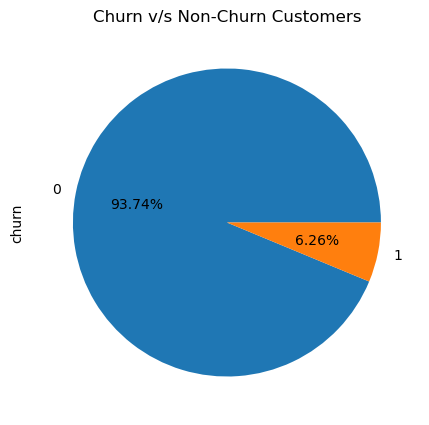

In [35]:
plt.figure(figsize=(7,5))
plt.title("Churn v/s Non-Churn Customers")
df['churn'].value_counts().plot.pie(autopct="%1.2f%%")
plt.show()

There are around only 6% churn customers which is very low. So, we need to have some class imbalance techniques used before final prediction.

### MOU value for Month 9 (SEPTEMBER)

Churn customers are being tagged and now all columns all the attributes corresponding to the churn phase all attributes having ‘ _9’, etc. in their names are removed. 

In [36]:
churn_col = [col for col in df.columns.to_list() if '_9' in col]
churn_col

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [37]:
df = df.drop(churn_col, axis=1)
df = df.drop('sep_vbc_3g', axis=1)
df.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
13     7002191713   492.846   205.671   593.260       501.76       108.39   
16     7000875565   430.975   299.869   187.894        50.51        74.01   
17     7000187447   690.008    18.980    25.499      1185.91         9.28   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  monthly_3g_8  \
7         52.29        453.43        567.16        325.91  ...             0   
8         35.08         94.66         80.63        136.48  ...             0   
13       534.24        413.31        119.28        482.46  ...             0   
16        70.61        296.29        229.74        162.76  ...             0   
17         7.79         61.64          0.00          5.54  ...             0   

    sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  aug_vbc_3g  jul_vbc_3g  \
7             0            0            0   802       57.74       19.38   
8             0            0            0   315       21.03      910.65   
13            0            0            0  2607        0.00        0.00   
16            0            0            0   511        0.00        2.45   
17            0            0            0   667        0.00        0.00   

    jun_vbc_3g  average_rech_amt_6_7  churn  
7        18.74                1185.0      1  
8       122.16                 519.0      0  
13        0.00                 380.0      0  
16       21.89                 459.0      0  
17        0.00                 408.0      0  

[5 rows x 127 columns]

After dropping all columns related to churn phase, only 127 columns are left in the dataset.

In [38]:
null_values = {}
for col in df.columns:
    null_values[col] = df[col].isnull().sum()

null_values

{'mobile_number': 0,
 'arpu_6': 0,
 'arpu_7': 0,
 'arpu_8': 0,
 'onnet_mou_6': 0,
 'onnet_mou_7': 0,
 'onnet_mou_8': 0,
 'offnet_mou_6': 0,
 'offnet_mou_7': 0,
 'offnet_mou_8': 0,
 'roam_ic_mou_6': 0,
 'roam_ic_mou_7': 0,
 'roam_ic_mou_8': 0,
 'roam_og_mou_6': 0,
 'roam_og_mou_7': 0,
 'roam_og_mou_8': 0,
 'loc_og_t2t_mou_6': 0,
 'loc_og_t2t_mou_7': 0,
 'loc_og_t2t_mou_8': 0,
 'loc_og_t2m_mou_6': 0,
 'loc_og_t2m_mou_7': 0,
 'loc_og_t2m_mou_8': 0,
 'loc_og_t2f_mou_6': 0,
 'loc_og_t2f_mou_7': 0,
 'loc_og_t2f_mou_8': 0,
 'loc_og_t2c_mou_6': 0,
 'loc_og_t2c_mou_7': 0,
 'loc_og_t2c_mou_8': 0,
 'loc_og_mou_6': 0,
 'loc_og_mou_7': 0,
 'loc_og_mou_8': 0,
 'std_og_t2t_mou_6': 0,
 'std_og_t2t_mou_7': 0,
 'std_og_t2t_mou_8': 0,
 'std_og_t2m_mou_6': 0,
 'std_og_t2m_mou_7': 0,
 'std_og_t2m_mou_8': 0,
 'std_og_t2f_mou_6': 0,
 'std_og_t2f_mou_7': 0,
 'std_og_t2f_mou_8': 0,
 'std_og_mou_6': 0,
 'std_og_mou_7': 0,
 'std_og_mou_8': 0,
 'isd_og_mou_6': 0,
 'isd_og_mou_7': 0,
 'isd_og_mou_8': 0,
 'spl_og_m

In [39]:
df.shape

(28861, 127)

Now, with these changes there is no null values in the dataset.

### Mobile Number column

In [40]:
df["mobile_number"].nunique()

28861

Column mobile number is unique for all the customer. And it is not the attribute based on which the churn could be predicted. Hence, this column is dropped from the dataset.

In [41]:
df.drop(columns=["mobile_number"], inplace=True)
df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
13   492.846   205.671   593.260       501.76       108.39       534.24   
16   430.975   299.869   187.894        50.51        74.01        70.61   
17   690.008    18.980    25.499      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
7         453.43        567.16        325.91          16.23  ...   
8          94.66         80.63        136.48           0.00  ...   
13        413.31        119.28        482.46          23.53  ...   
16        296.29        229.74        162.76           0.00  ...   
17         61.64          0.00          5.54           0.00  ...   

    monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  aug_vbc_3g  \
7              0            0            0            0   802       57.74   
8              0            0            0            0   315       21.03   
13             0            0            0            0  2607        0.00   
16             0            0            0            0   511        0.00   
17             0            0            0            0   667        0.00   

    jul_vbc_3g  jun_vbc_3g  average_rech_amt_6_7  churn  
7        19.38       18.74                1185.0      1  
8       910.65      122.16                 519.0      0  
13        0.00        0.00                 380.0      0  
16        2.45       21.89                 459.0      0  
17        0.00        0.00                 408.0      0  

[5 rows x 126 columns]

## Handling outliers for numerical columns

In [42]:
num_columns = df.select_dtypes(include=np.number).columns.tolist()
print(len(num_columns))

126


In [43]:
for col in num_columns:
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3 - q1
    data = df[(df[col] >= q1 - 1.5*iqr) & (df[col] <= q3 + 1.5*iqr)]

data.shape

(27054, 126)

## Extracting useful insights using EDA 

In [44]:
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()

### Recharge Amount variable

In [45]:
rec_amt_columns =  df.columns[df.columns.str.contains('rech_amt')]
rec_amt_columns.tolist()
rec_amt_columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'average_rech_amt_6_7'],
      dtype='object')

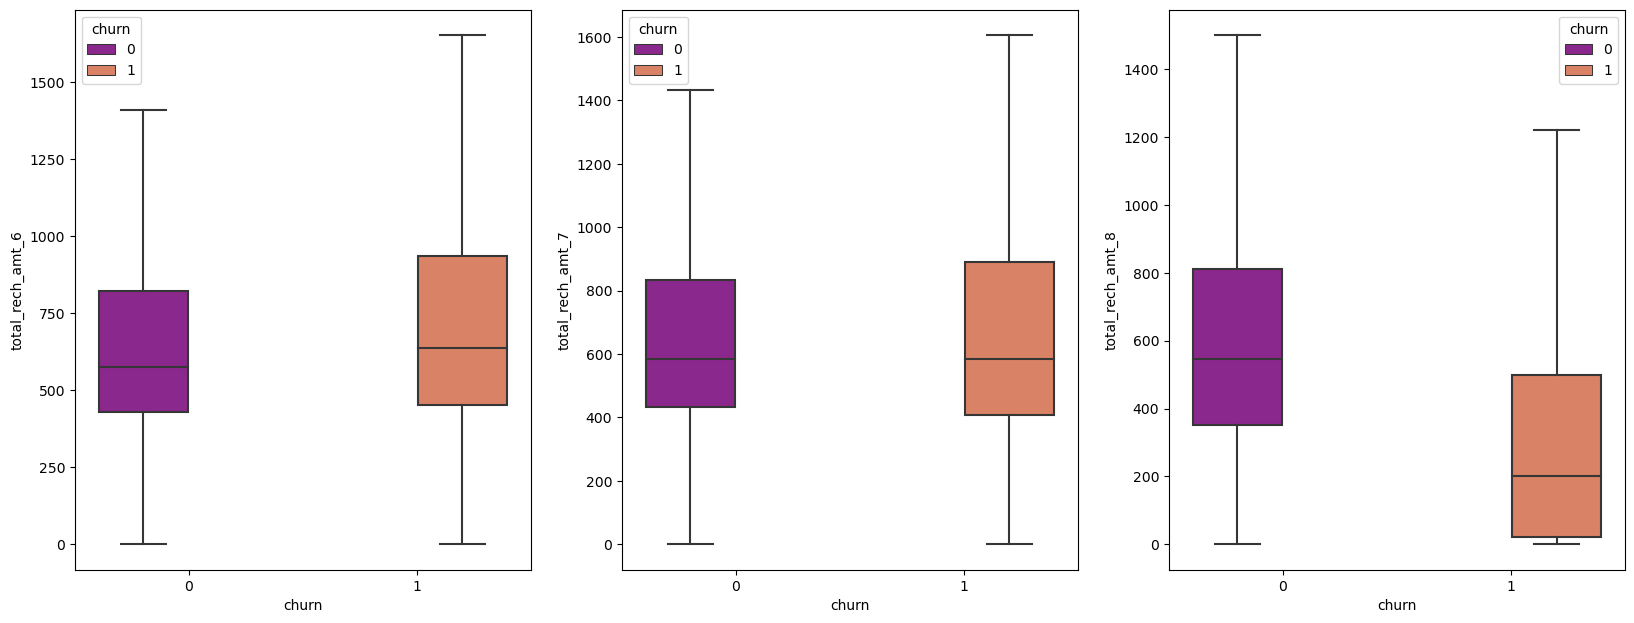

In [46]:
plot_box_chart('total_rech_amt')

For June and July month, there isn't much difference in total recharge amount for the customers. But for churn customers, recharge amount is significantly low in August month.

### Maximum recharge amount for data

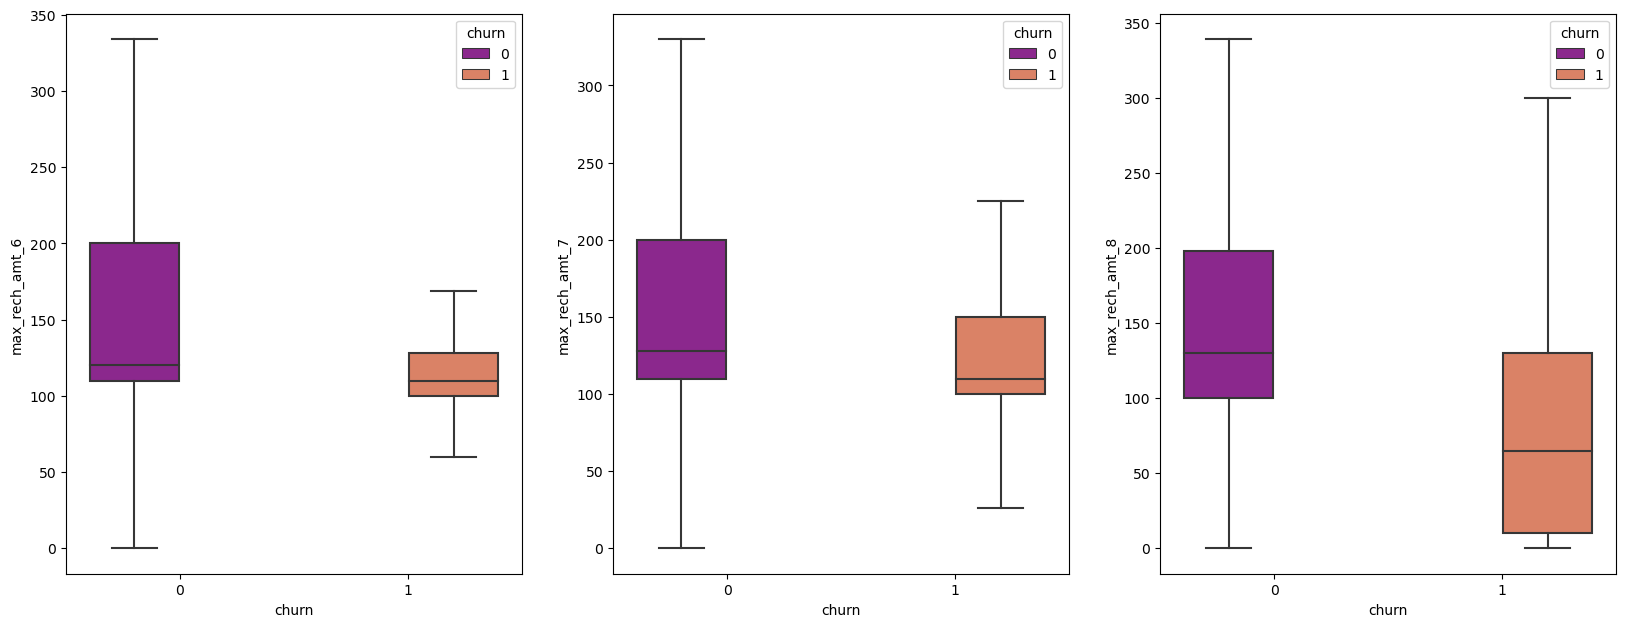

In [47]:
plot_box_chart('max_rech_amt')

For June and July month, there isn't much difference in maximum recharge amount for the customers. But for churn customers, maximum recharge amount is significantly low in August month.

### Total recharge number

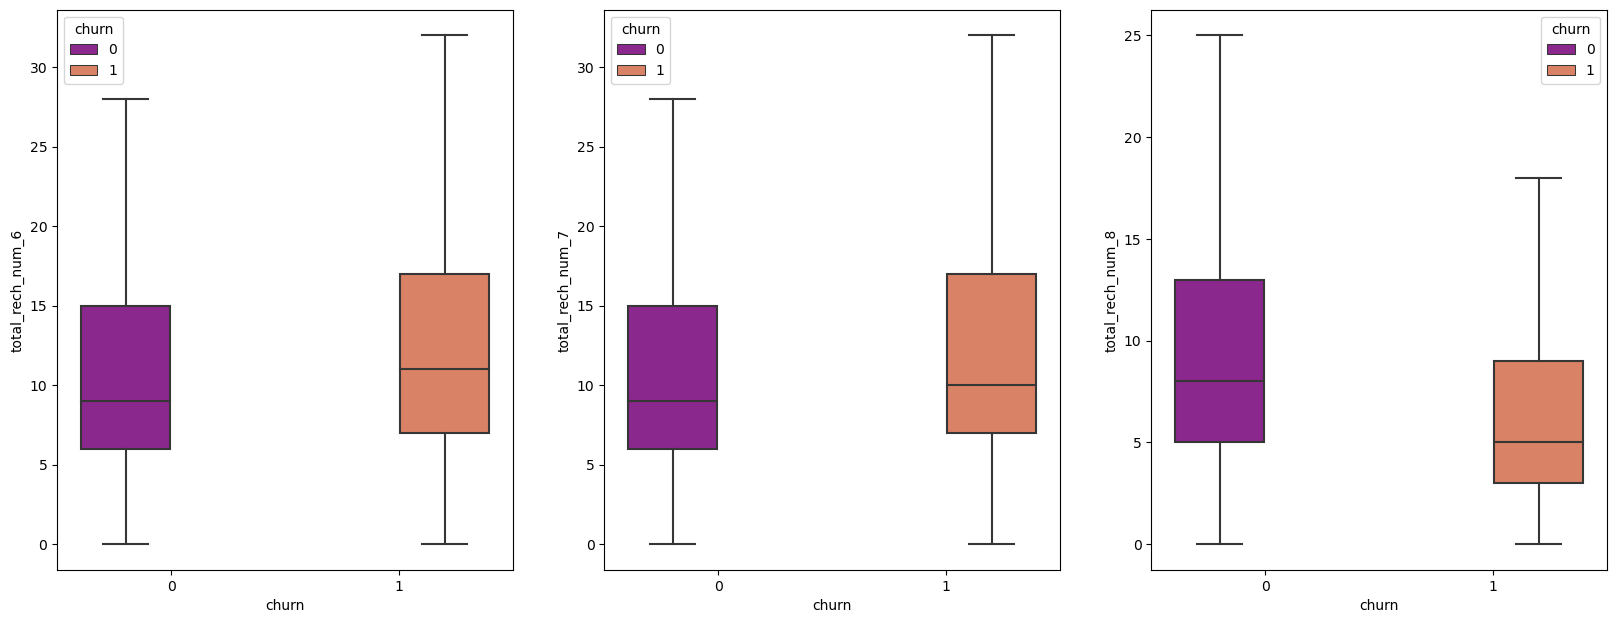

In [48]:
plot_box_chart('total_rech_num')

For June and July month, there isn't much difference in total recharge number for the customers. But for churn customers, total recharge number is significantly low in August month.

### Vol 2g mb, Vol 3g mb

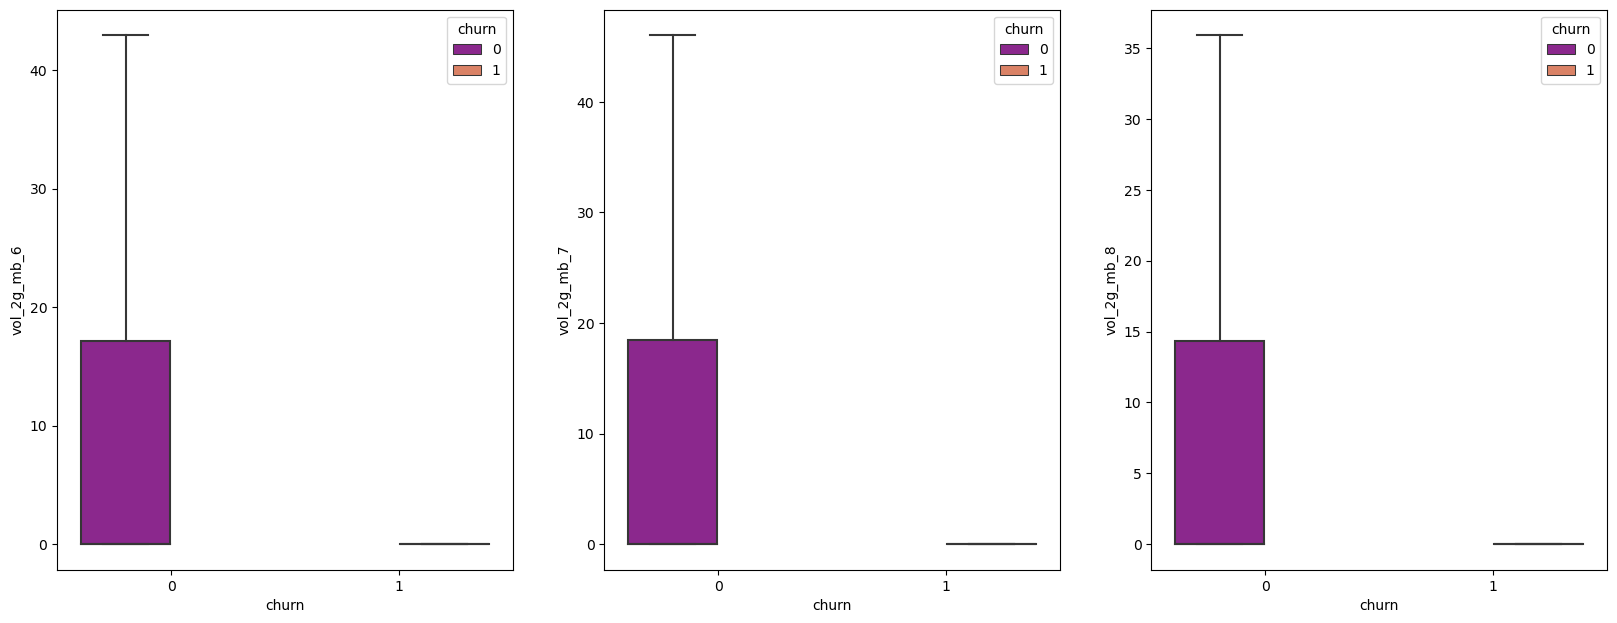

In [49]:
plot_box_chart('vol_2g_mb')

For June and July month, there isn't much difference in vol 2g mb for the customers. But for churn customers, vol 2g mb is significantly low in August month.

### arpu

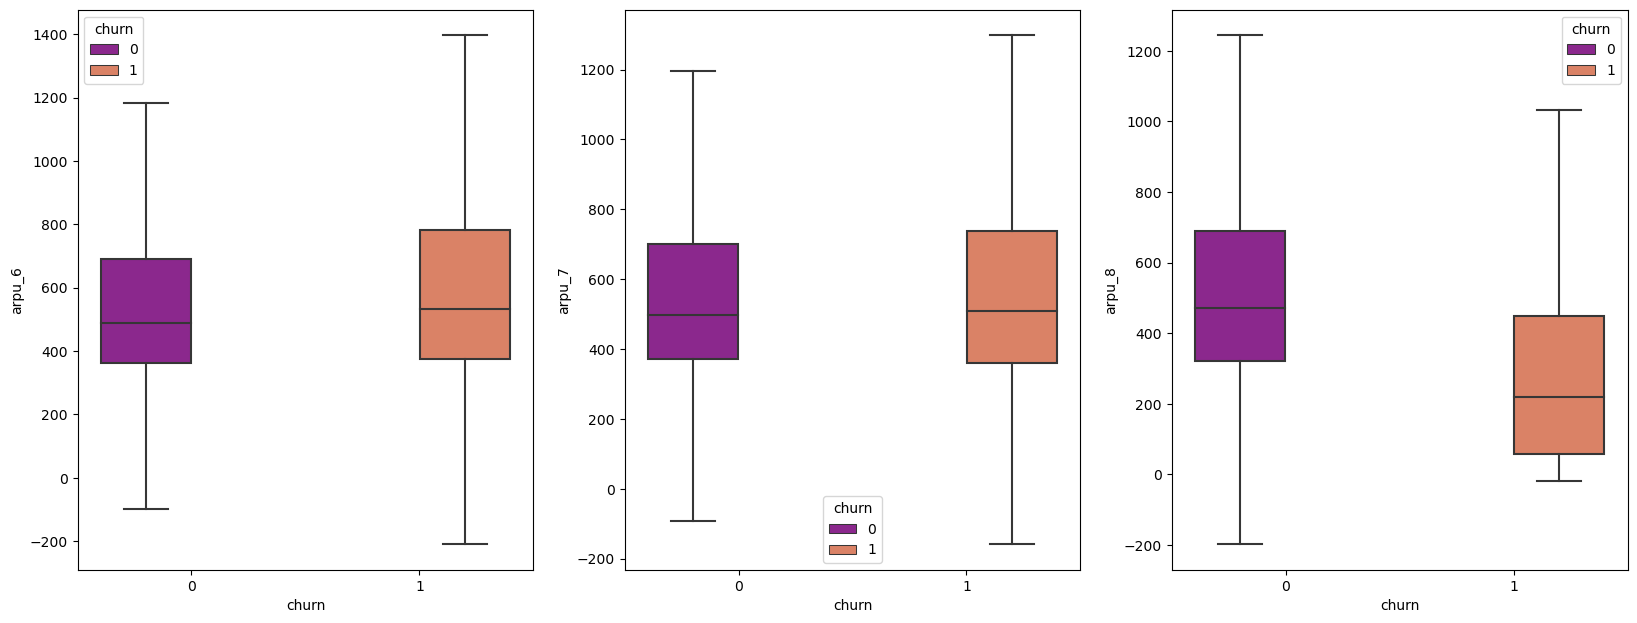

In [50]:
plot_box_chart('arpu')

For June and July month, there isn't much difference in arpu for the customers. But for churn customers, arpu is significantly low in August month.

### onnet mou column

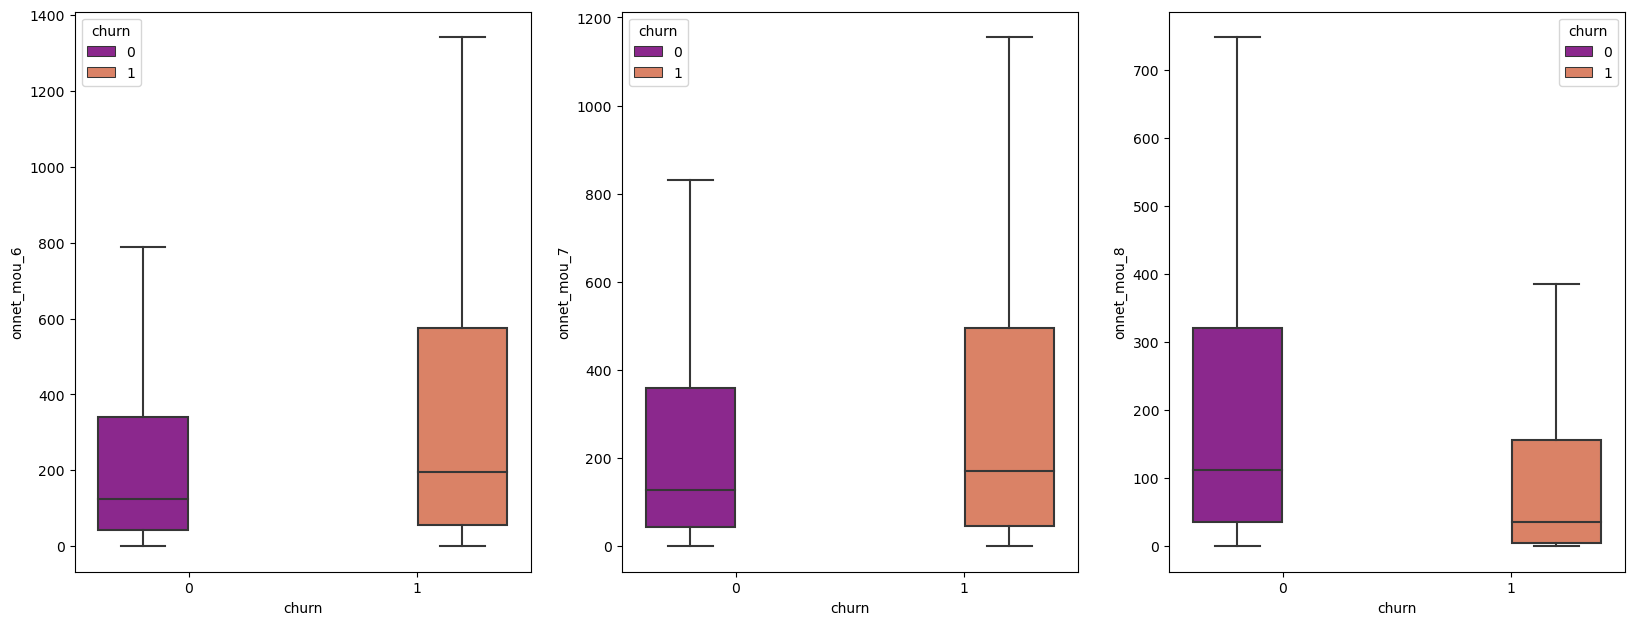

In [51]:
plot_box_chart('onnet_mou')

For June and July month, there isn't much difference in onnet mou for the customers. But for churn customers, onnet mou is significantly low in August month.

### offnet mou column

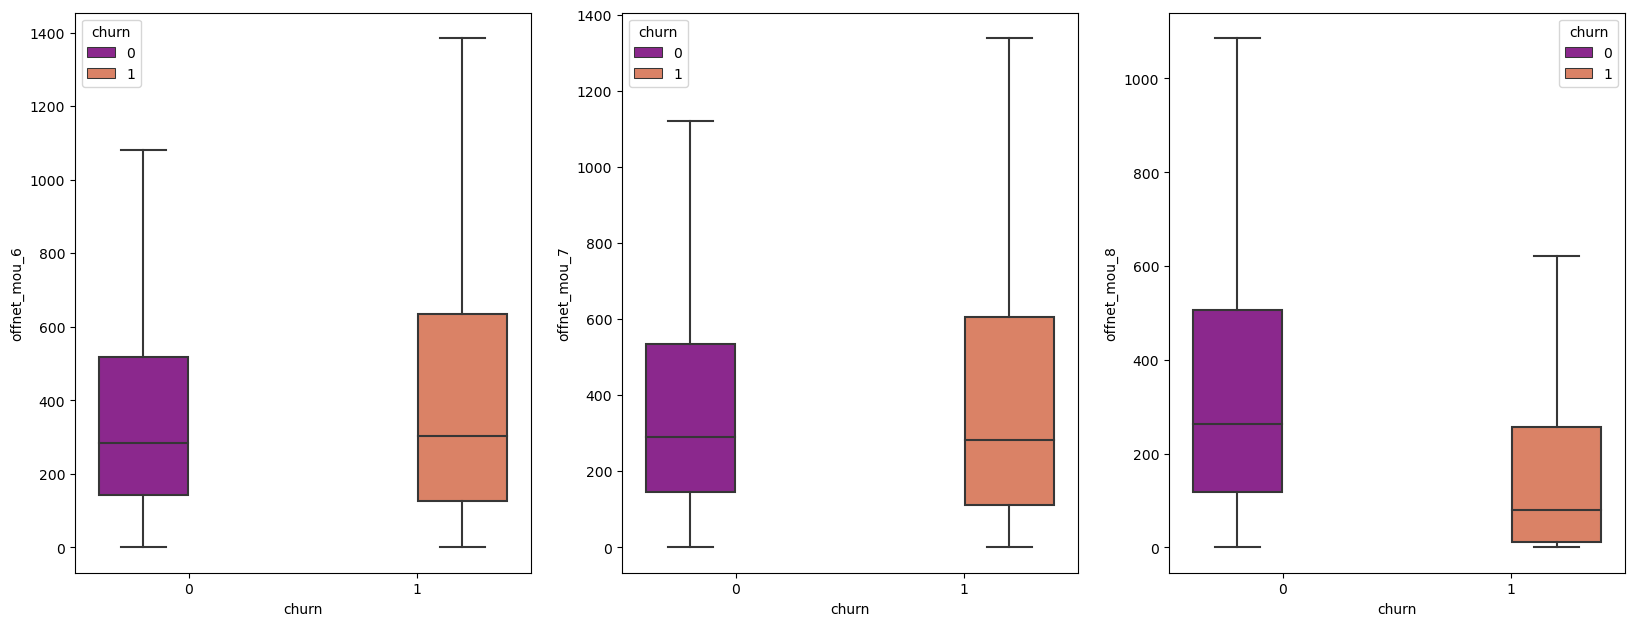

In [52]:
plot_box_chart('offnet_mou')

For June and July month, there isn't much difference in offnet mou for the customers. But for churn customers, offnet mou is significantly low in August month.

### loc_og_t2t_mou, loc_og_t2m_mou and loc_og_t2f_mou

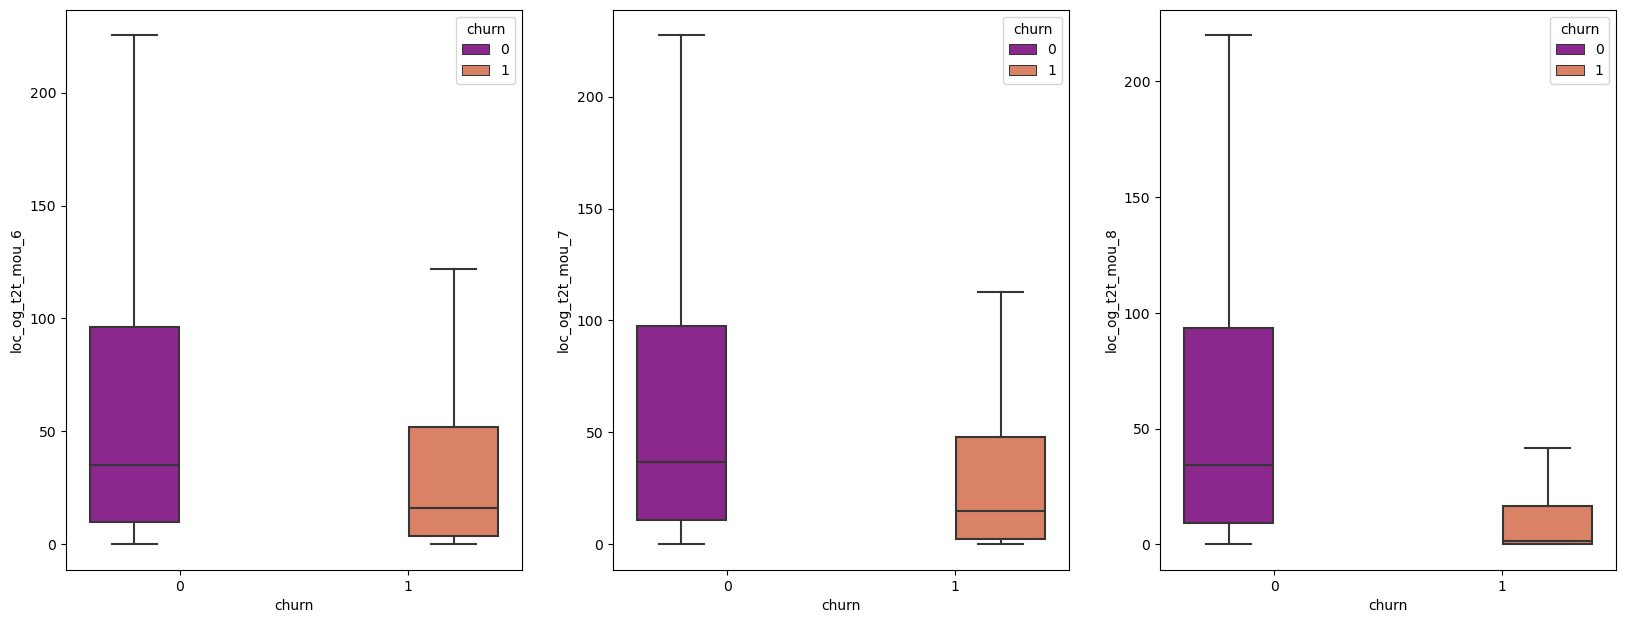

In [53]:
plot_box_chart('loc_og_t2t_mou')

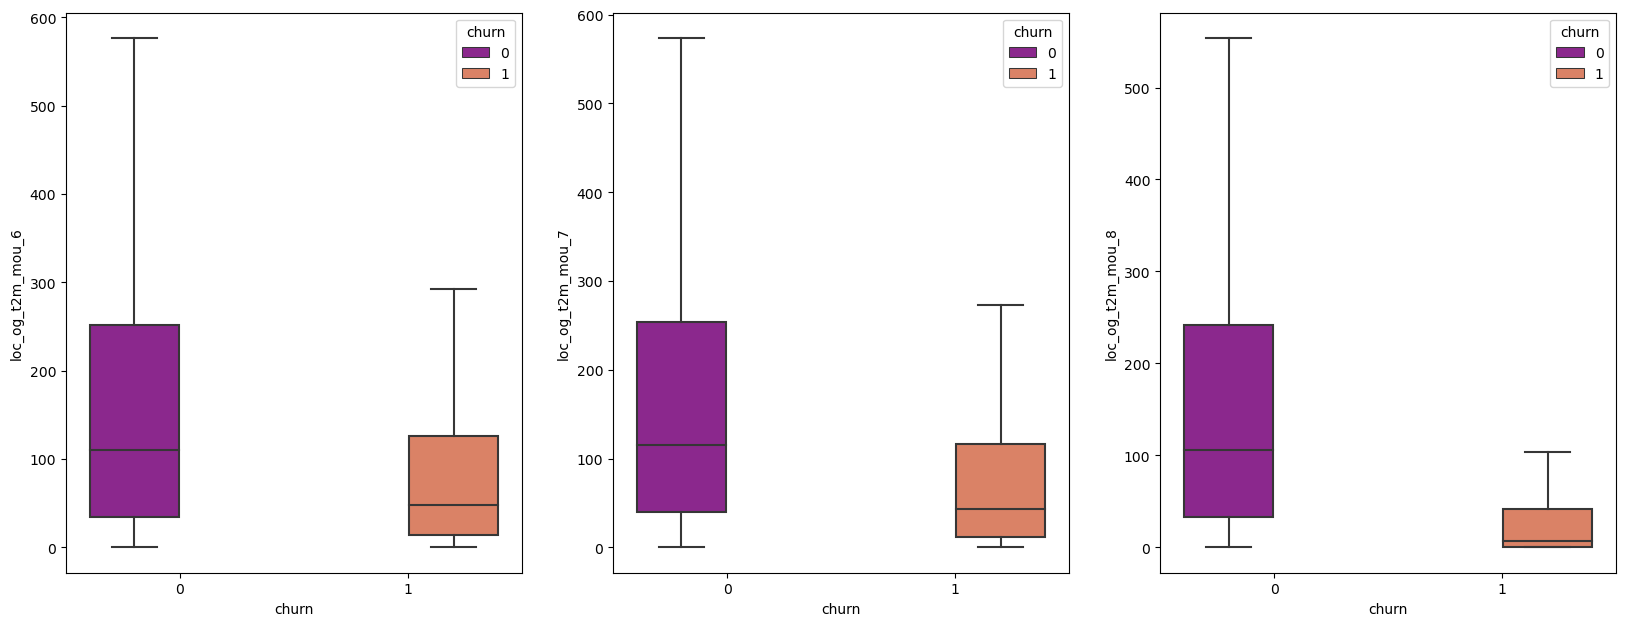

In [54]:
plot_box_chart('loc_og_t2m_mou')

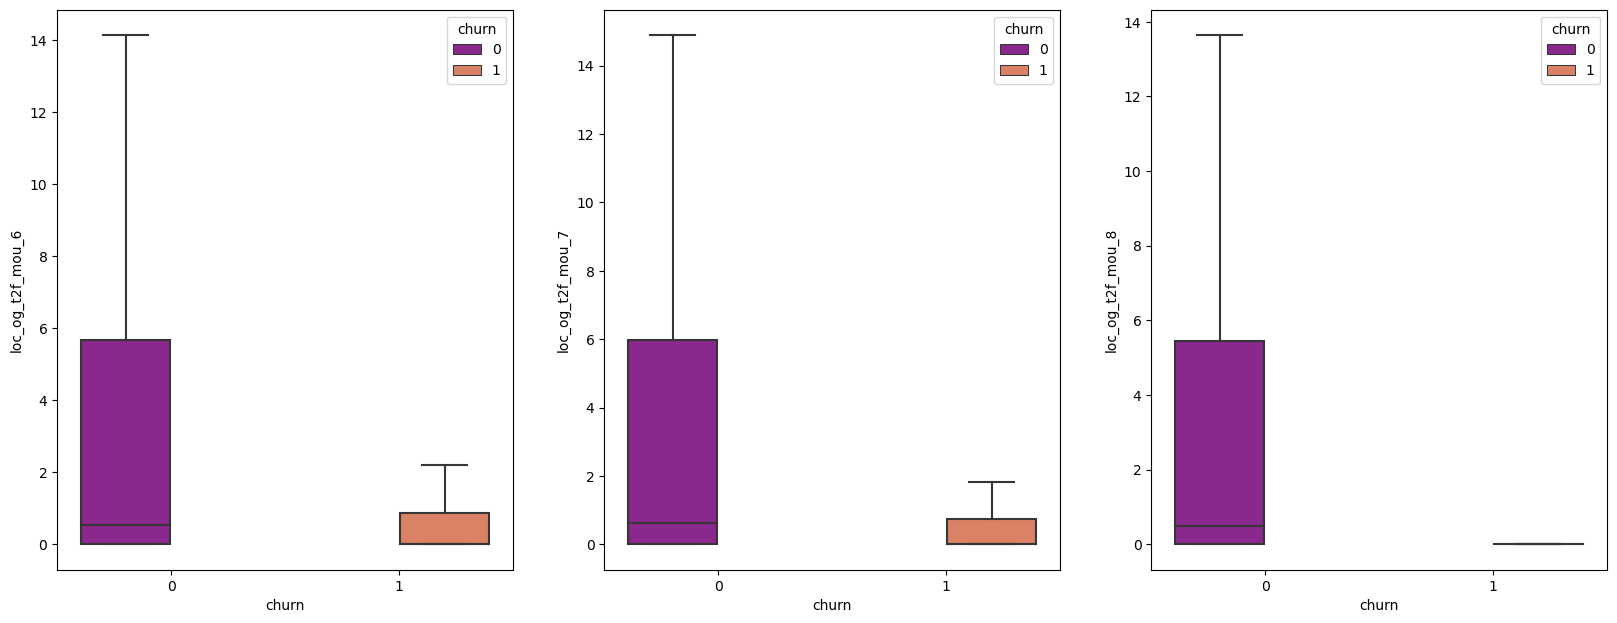

In [55]:
plot_box_chart('loc_og_t2f_mou')

Value of all variables are decreasing for churn customers and for august period, value is very low.

## Checking correlation matrix for all data month-wise

### June month

In [56]:
col_6 = df.columns[df.columns.str.contains('_6')]
col_6.tolist()
col_6 

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6',
       'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6',
       'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6',
       'last_day_rch_amt_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6',
       'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6', 'average_rech_amt_6_7'],
      dtype='object')

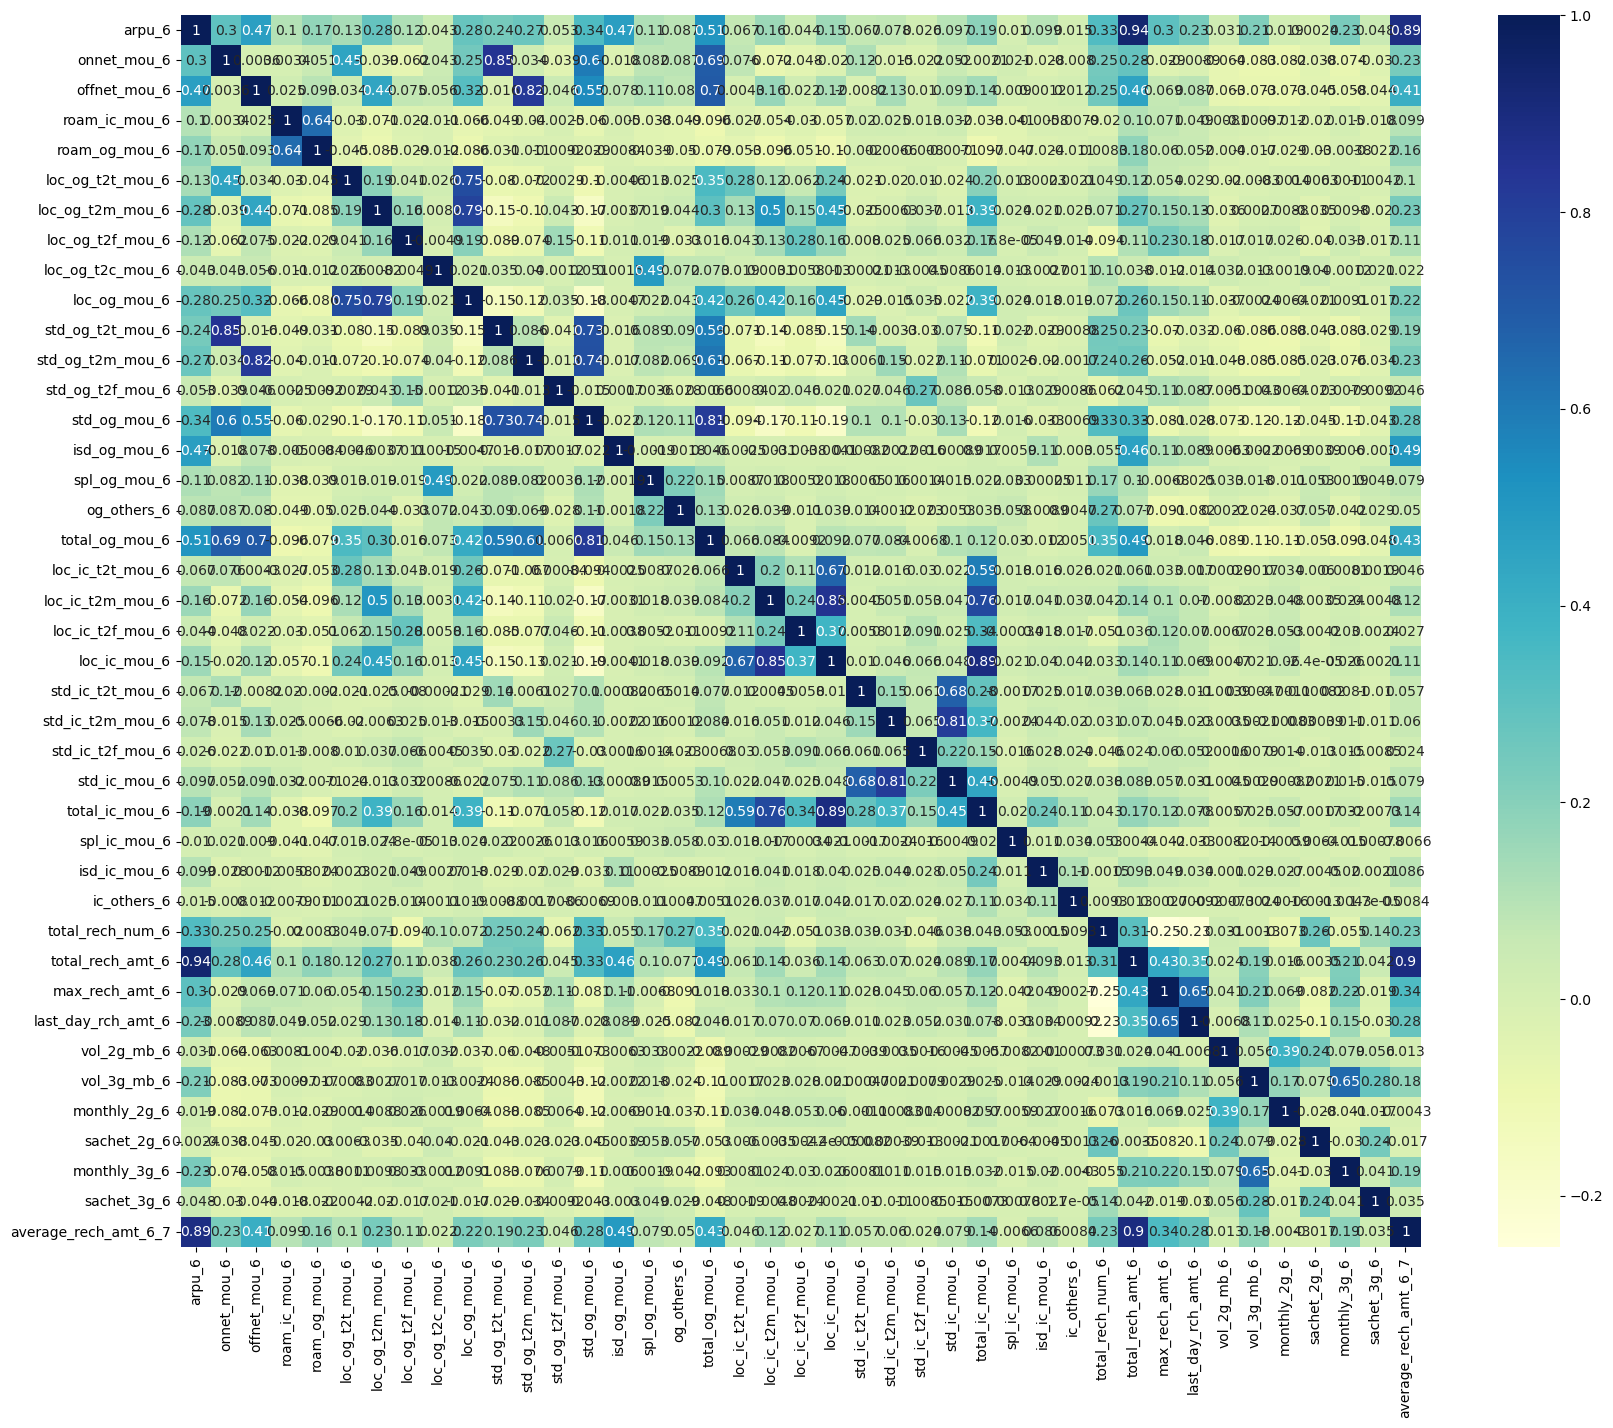

In [57]:
plt.figure(figsize=(20,16))
sns.heatmap(df[col_6].corr(), annot=True, cmap="YlGnBu")
plt.show()

There are many variables in the heatmap so that heatmap is not visible properly. Few selected variables are tried to see the data again.

In [58]:
mou_og_cols6 = df.columns[df.columns.str.contains('.*_og_.*mou_6',regex=True)]
mou_og_cols6.tolist()

['roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'total_og_mou_6']

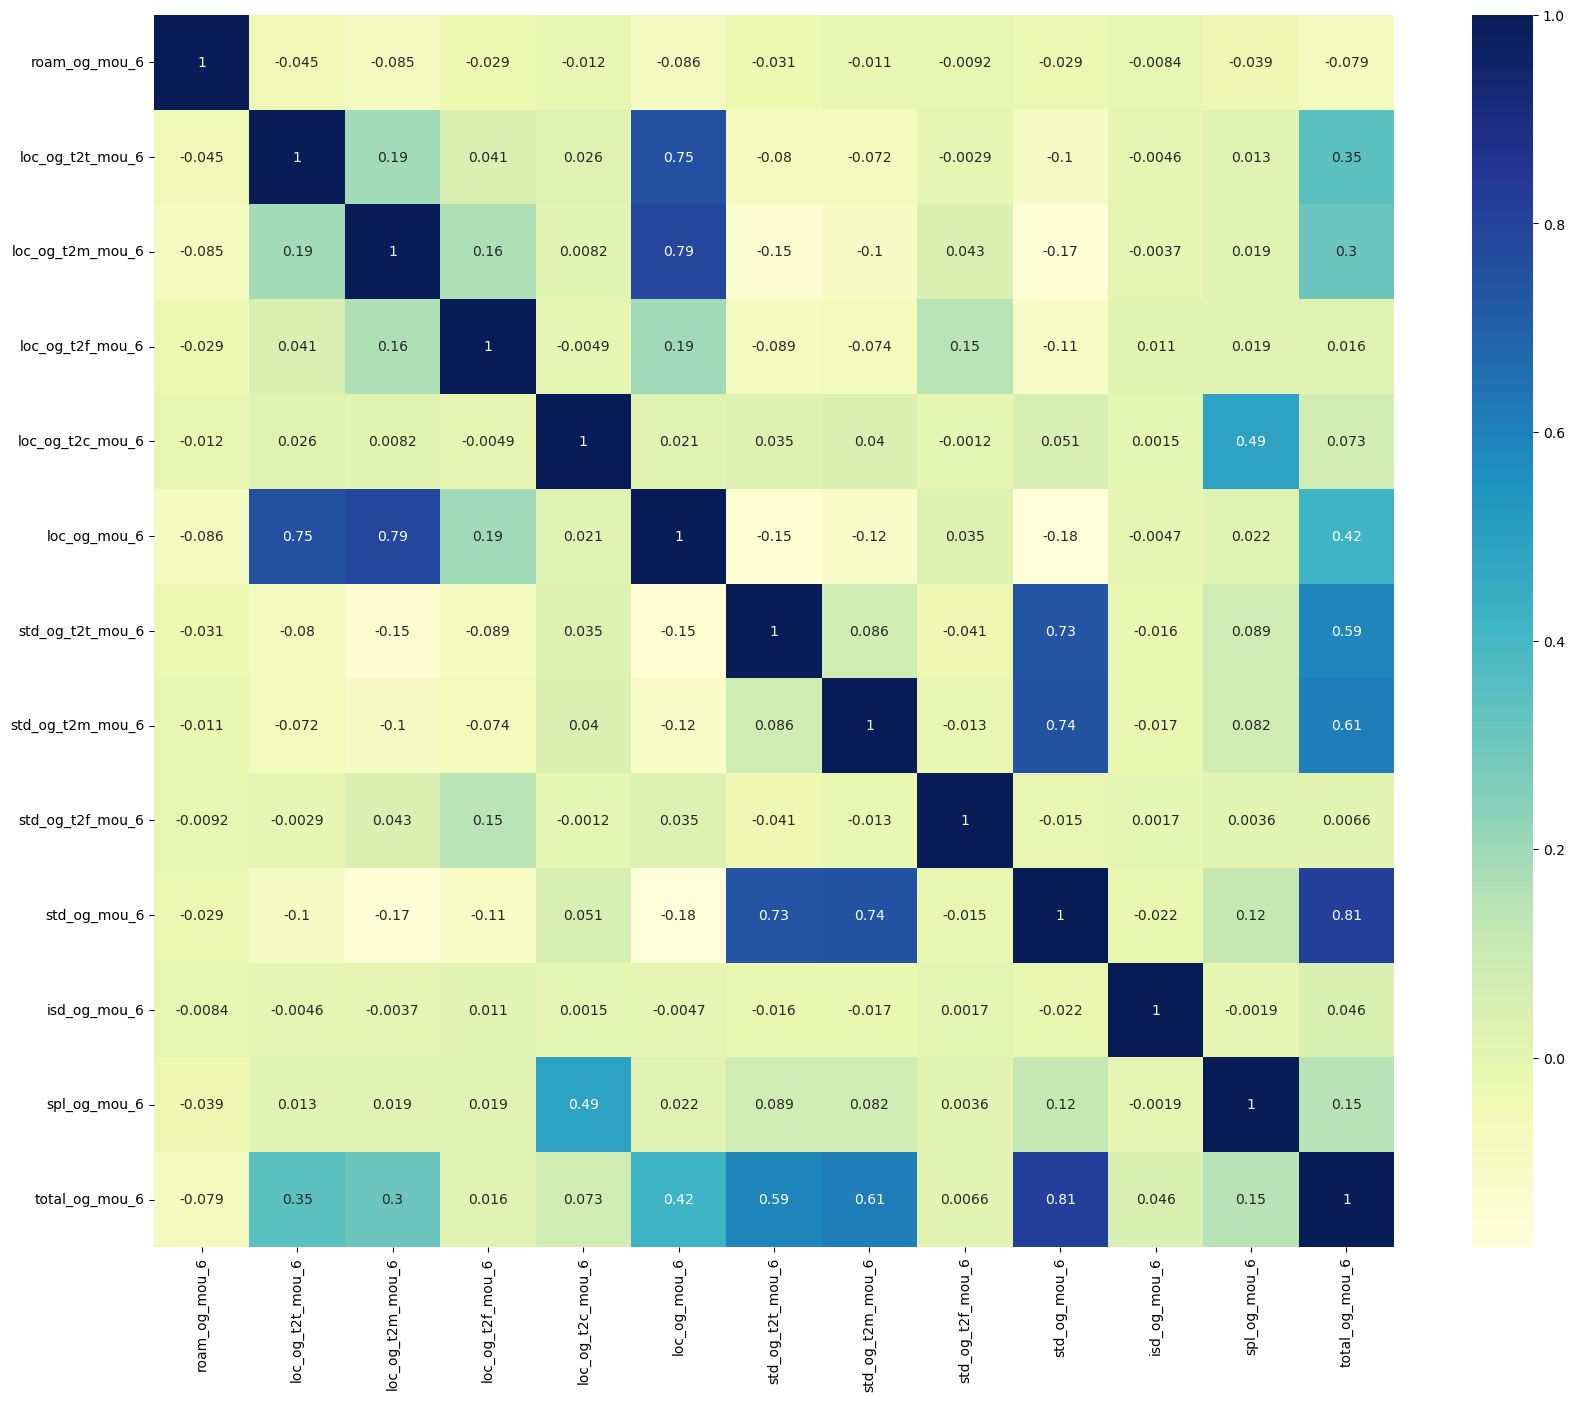

In [59]:
plt.figure(figsize=(20,16))
sns.heatmap(df[mou_og_cols6].corr(), annot=True, cmap="YlGnBu")
plt.show()

total_og_mou_6, std_og_mou_6 and loc_og_mou_6 seems to have strong correlation with other fields.

### July month

In [60]:
col_7 = df.columns[df.columns.str.contains('_7')]
col_7.tolist()
col_7 

Index(['arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7',
       'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7',
       'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7',
       'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7',
       'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7',
       'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7',
       'total_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7',
       'total_rech_num_7', 'total_rech_amt_7', 'max_rech_amt_7',
       'last_day_rch_amt_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7',
       'sachet_2g_7', 'monthly_3g_7', 'sachet_3g_7', 'average_rech_amt_6_7'],
      dtype='object')

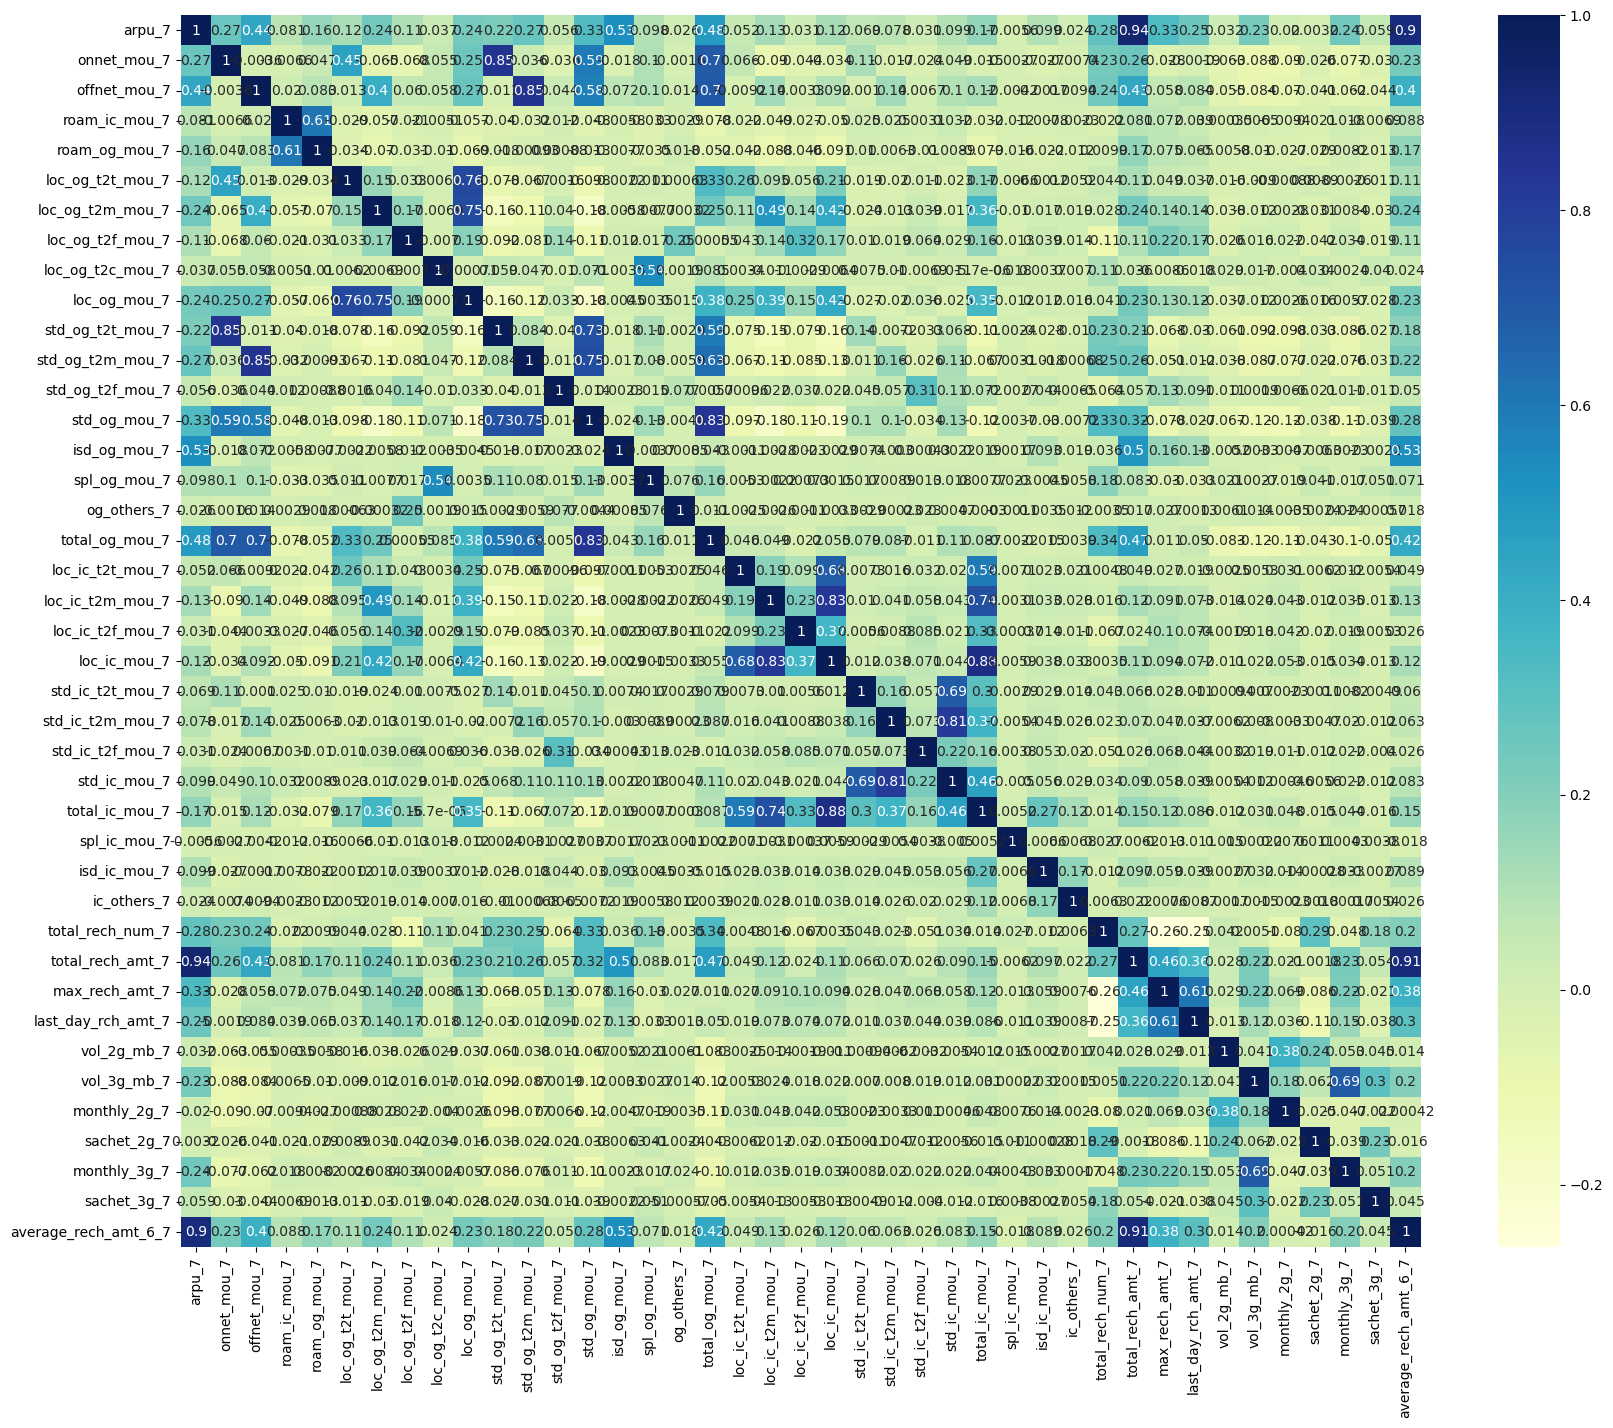

In [61]:
plt.figure(figsize=(20,16))
sns.heatmap(df[col_7].corr(), annot=True, cmap="YlGnBu")
plt.show()

In [62]:
mou_og_cols7 = df.columns[df.columns.str.contains('.*_og_.*mou_7',regex=True)]
mou_og_cols7.tolist()

['roam_og_mou_7',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_7',
 'std_og_mou_7',
 'isd_og_mou_7',
 'spl_og_mou_7',
 'total_og_mou_7']

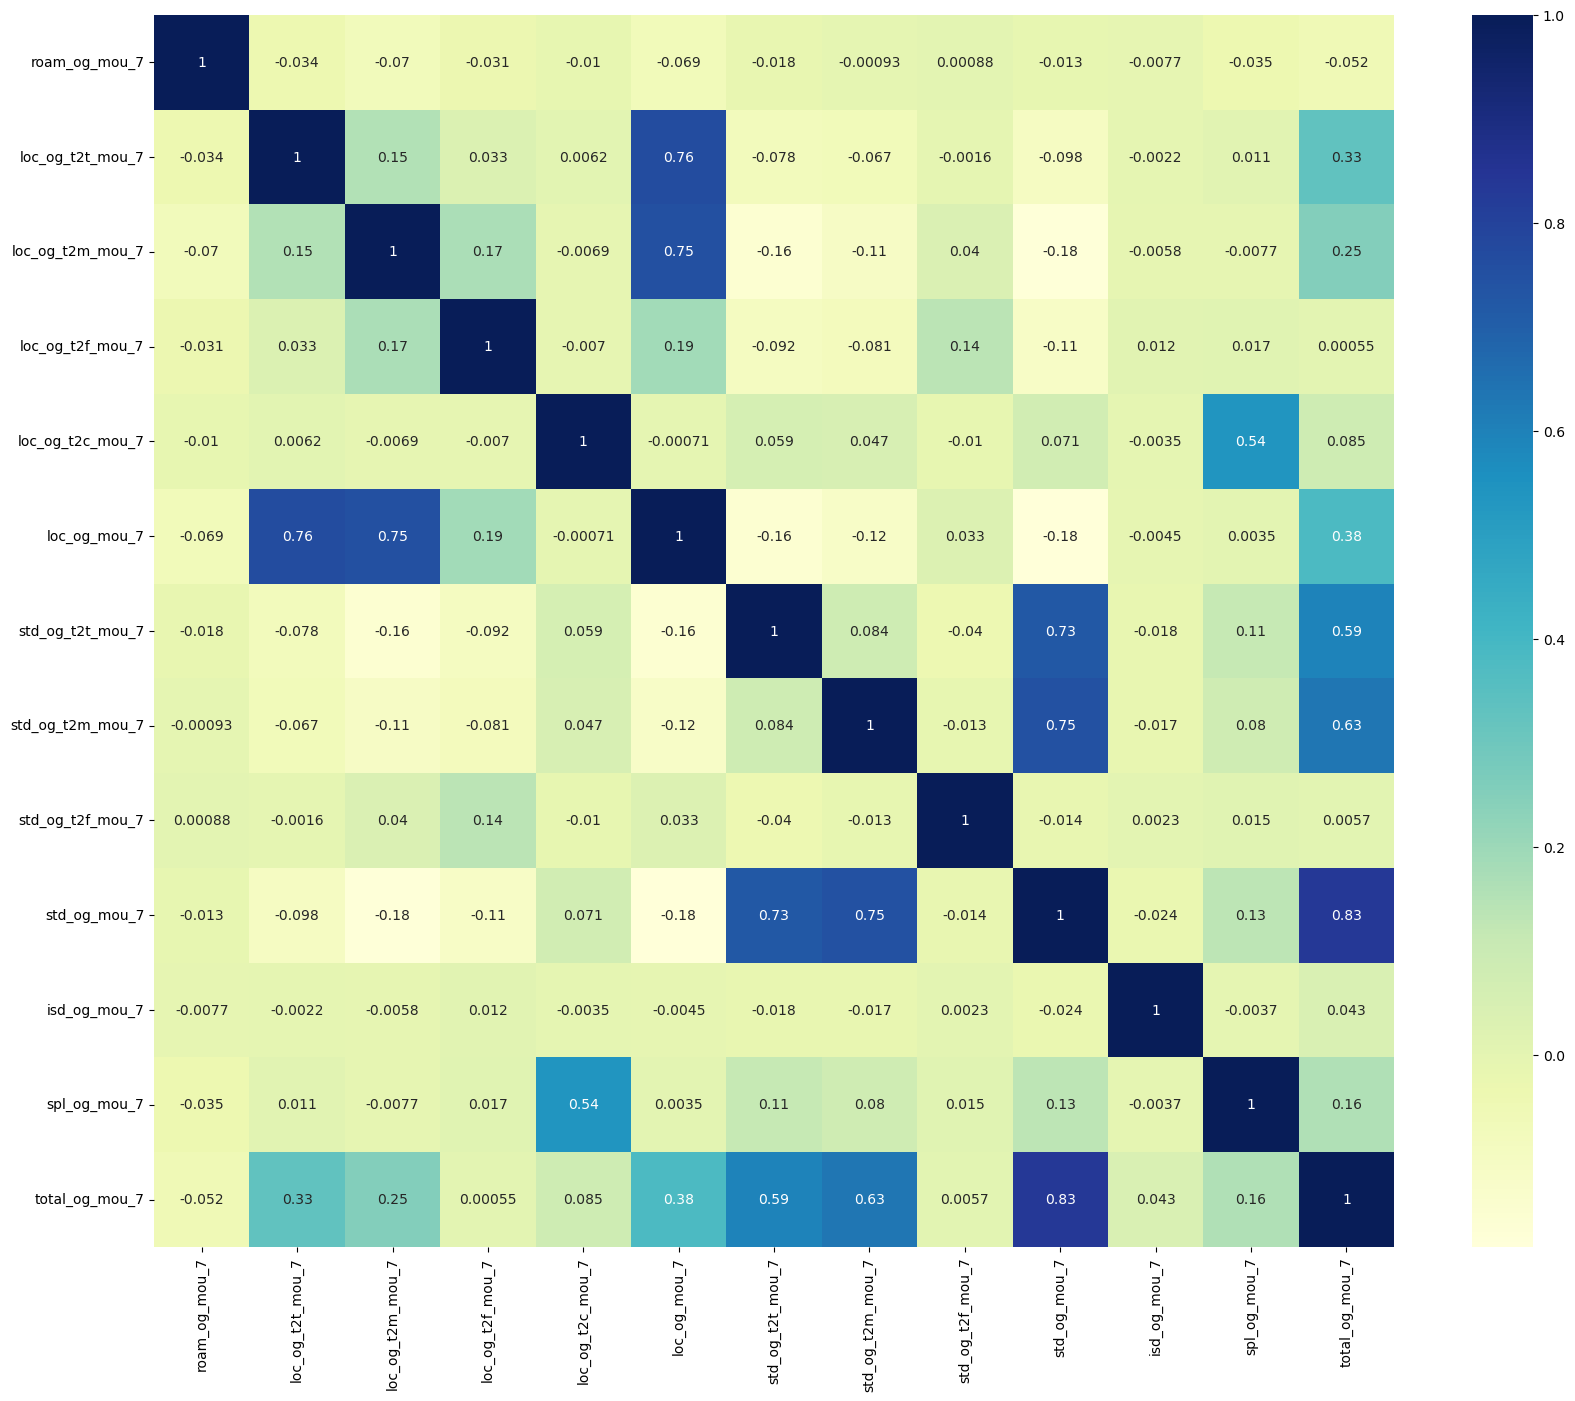

In [63]:
plt.figure(figsize=(20,16))
sns.heatmap(df[mou_og_cols7].corr(), annot=True, cmap="YlGnBu")
plt.show()

total_og_mou_7, std_og_mou_7 and loc_og_mou_7 seems to have strong correlation with other fields.

### August month

In [64]:
col_8 = df.columns[df.columns.str.contains('_8')]
col_8.tolist() 

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8']

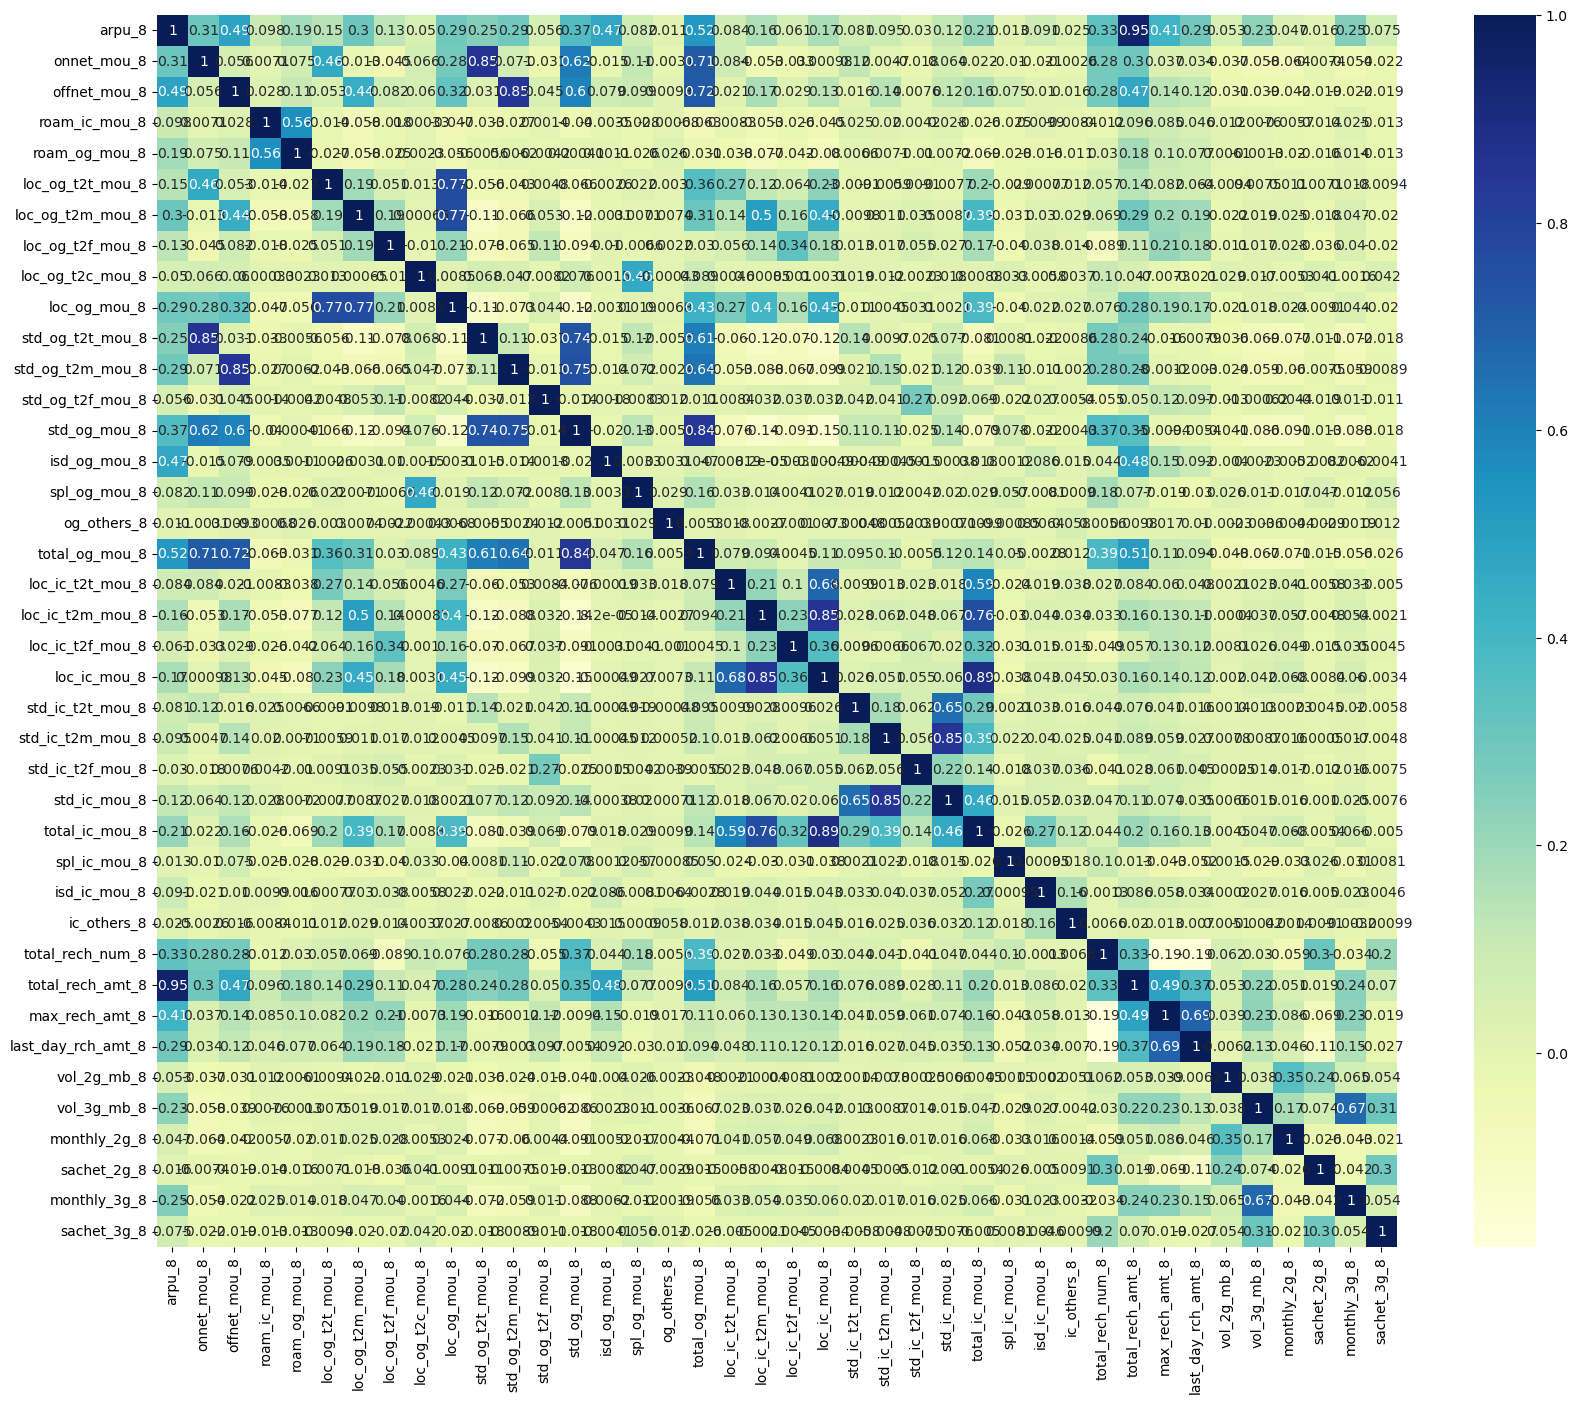

In [65]:
plt.figure(figsize=(20,16))
sns.heatmap(df[col_8].corr(), annot=True, cmap="YlGnBu")
plt.show()

In [66]:
mou_og_cols8 = df.columns[df.columns.str.contains('.*_og_.*mou_8',regex=True)]
mou_og_cols8.tolist()

['roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'total_og_mou_8']

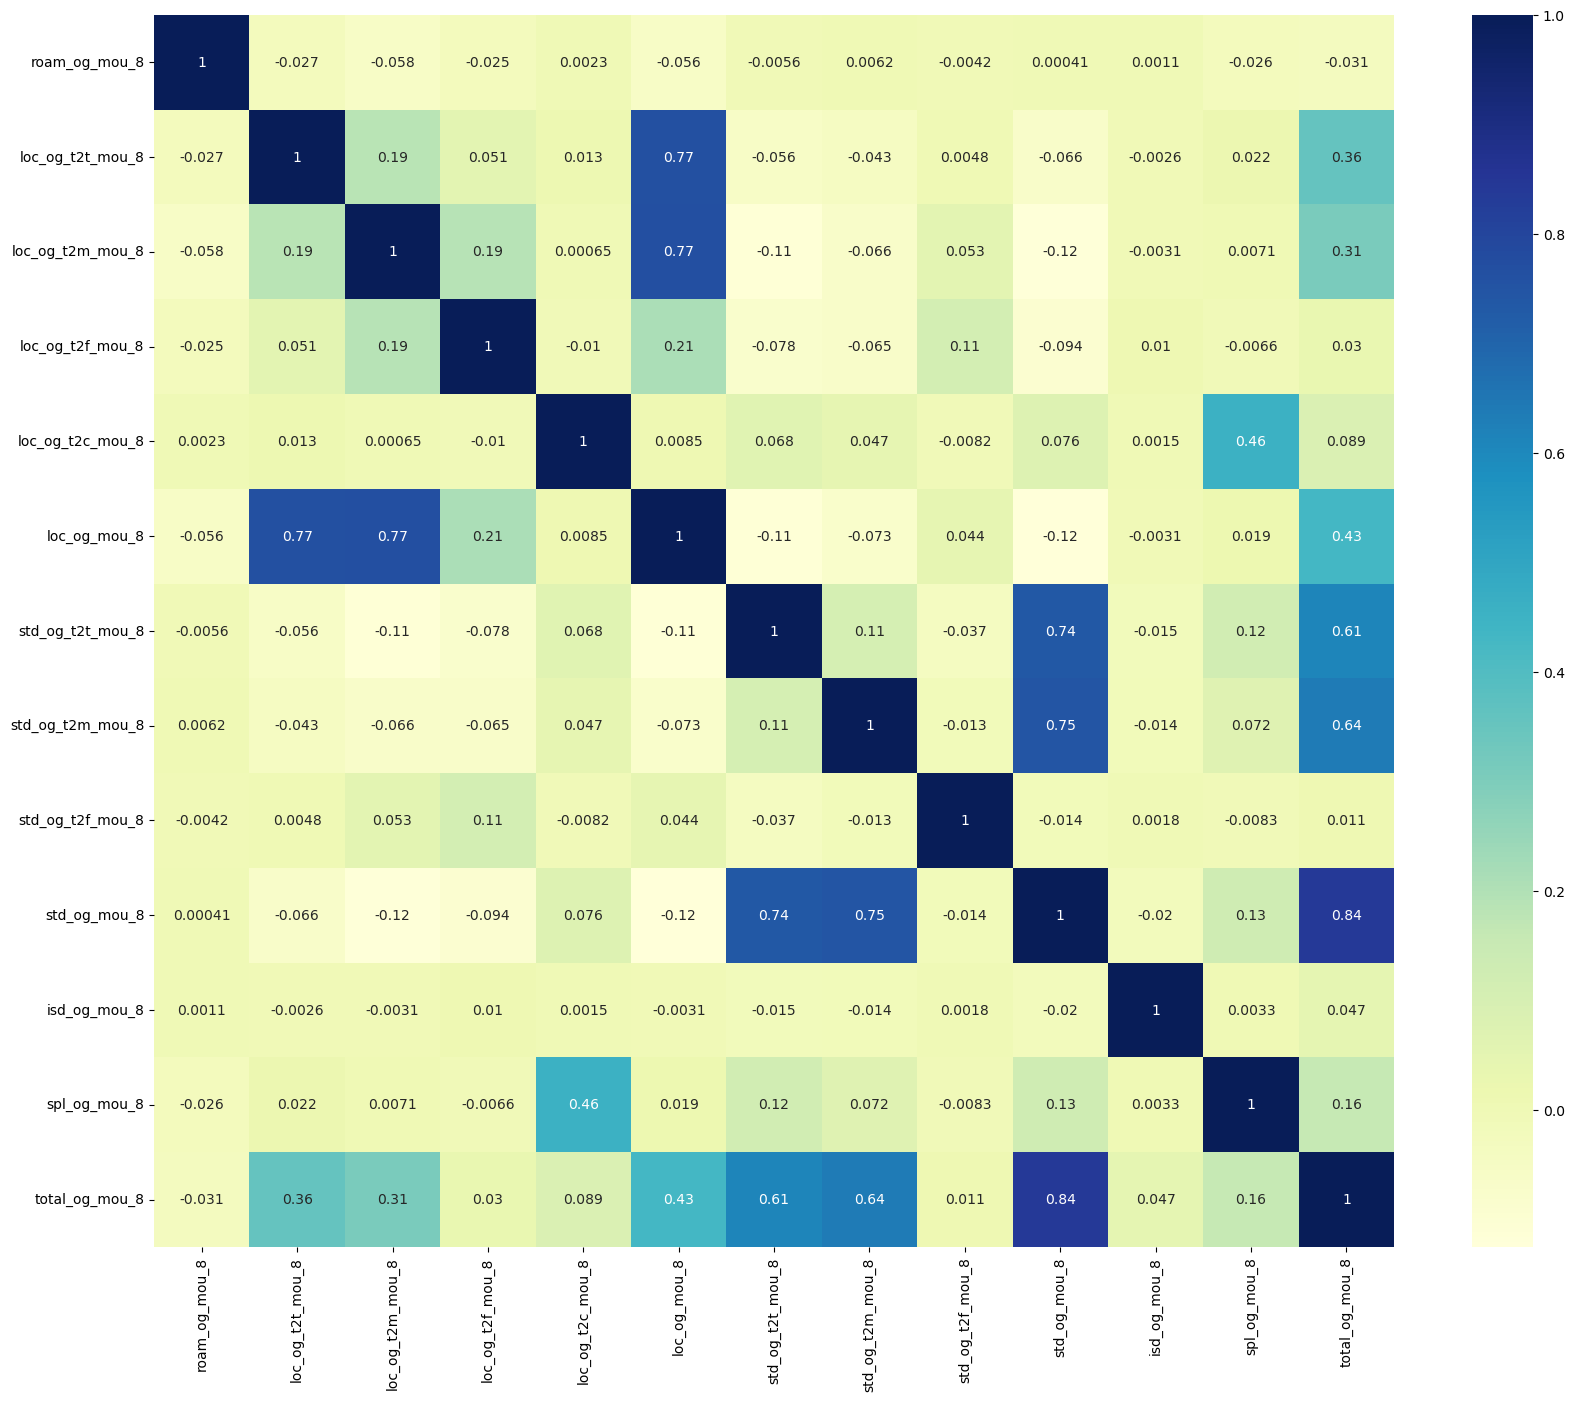

In [67]:
plt.figure(figsize=(20,16))
sns.heatmap(df[mou_og_cols8].corr(), annot=True, cmap="YlGnBu")
plt.show()

total_og_mou_8, std_og_mou_8 and loc_og_mou_8 seems to have strong correlation with other fields.

## Tenure analysis

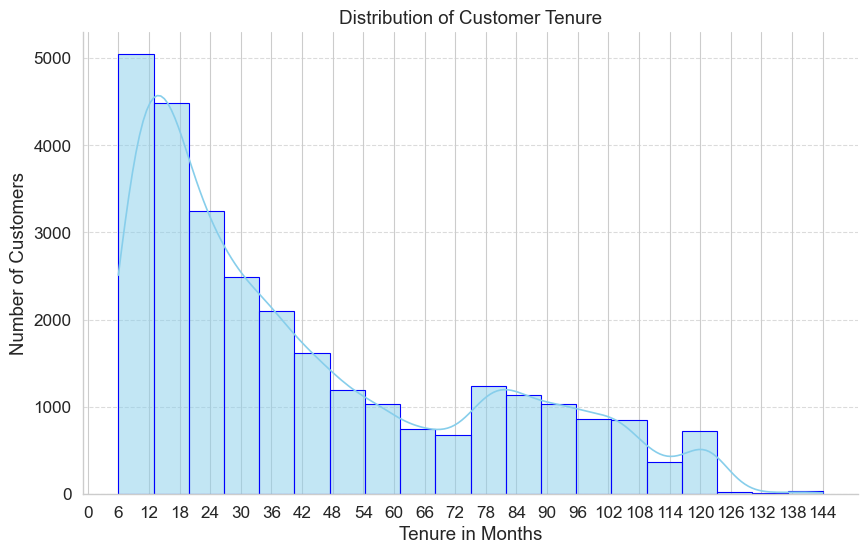

In [68]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.4)

plt.figure(figsize=(10, 6))

df['tenure'] = df['aon'] / 30

ax = sns.histplot(df['tenure'], bins=20, color='skyblue', edgecolor='blue', kde=True)

ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in Months')
ax.set_title('Distribution of Customer Tenure')

ax.set_xticks(range(0, int(max(df['tenure'])) + 1, 6))
ax.set_xticklabels(range(0, int(max(df['tenure'])) + 1, 6))

ax.grid(axis='y', linestyle='--', alpha=0.7)

sns.despine()

plt.show()


There are more number of customers with short tenure compared to long tenure which means there are more number of recently or newly joined customers.

# Step - 3: Modeling

### Pre-processing the data

In [69]:
Y = df["churn"]
X = df.drop(["churn"],axis=1)

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=100)

### Dealing with data imbalance

For handling the data imbalance, upsampling technique SMOTE (Synthetic Minority Oversampling Technique) is used.

In [71]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_train, y_train = sm.fit_resample(X_train, y_train)

### Feature Scaling

In [72]:
cols = X_train.columns.to_list()
cols 

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols]) 

X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  0.236920 -0.502052  0.492767    -0.132017    -0.059328     0.321030   
1 -0.593773 -0.461301  0.544912    -0.442182    -0.547496    -0.343686   
2  0.237660 -0.216182 -0.278664    -0.660940    -0.357212    -0.236417   
3 -0.407903 -0.539807 -0.810598     0.863555     0.733613    -0.209559   
4 -0.736747 -0.449041 -0.192445    -0.608409    -0.465520    -0.209159   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  monthly_3g_8  \
0     -0.423459     -0.283032      0.271990      -0.072963  ...      -0.22113   
1     -0.516632     -0.635459     -0.307491      -0.222393  ...      -0.22113   
2     -0.206810     -0.190567     -0.192230      -0.181470  ...      -0.22113   
3     -0.266810     -0.777575     -0.680052      -0.222393  ...      -0.22113   
4     -0.597569     -0.361481     -0.369310      -0.222393  ...      -0.22113   

   sachet_3g_6  sachet_3g_7  sachet_3g_8       aon  aug_vbc_3g  jul_vbc_3g  \
0     1.135052    -0.144483    -0.124658  1.713536    0.096256    0.002575   
1     1.135052    -0.144483    -0.124658  0.298975    1.841522    1.518673   
2    -0.141339    -0.144483    -0.124658  0.111042   -0.172755    0.423421   
3    -0.141339    -0.144483    -0.124658 -0.117403   -0.275125   -0.293642   
4    -0.141339    -0.144483    -0.124658 -0.822995    2.112182    2.354206   

   jun_vbc_3g  average_rech_amt_6_7    tenure  
0    1.023355             -0.264999  1.713391  
1    2.280392             -0.651720  0.298733  
2    0.355020             -0.009678  0.110787  
3   -0.278368             -0.532072 -0.117674  
4    1.542632             -0.641037 -0.823315  

[5 rows x 126 columns]

## Model - 1: Basic model with Logistic Regression (30 features)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()

In [75]:
def build_model(number_of_features, X_train, y_train):
    rfe = RFE(logreg, n_features_to_select=number_of_features)
    rfe = rfe.fit(X_train, y_train)
    print(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
    col = X_train.columns[rfe.support_]
    X_train = X_train[col]
    return X_train

In [76]:
import statsmodels.api as sm

def summarise_model(X_train, y_train):
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
    res = logm.fit()
    print(res.summary())
    return res

In [77]:
from sklearn import metrics

# Function to evaluate the model with different metrics like Pricision, Recall, F1_score, Specificity, Sensitivity, Accuracy
def evaluate_model(actual, predicted):
    confusion = metrics.confusion_matrix(actual, predicted)
    print('Confusion matrix: ')
    print(confusion)

    TP = confusion[1,1]  
    TN = confusion[0,0] 
    FP = confusion[0,1] 
    FN = confusion[1,0] 

    accuracy = (TP+TN)/(TP+TN+FP+FN)
    Specificity = TN/(TN+FP)
    Sensitivity = TP/(TP+FN)
    Pricision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1_score = 2*Pricision*Recall/(Pricision+Recall)
    
    print("Accuracy: ", accuracy)
    print("Specificity: ", Specificity)
    print("Sensitivity: ", Sensitivity)
    print("Precision: ", Pricision)
    print("Recall: ", Recall)
    print("F1_score: ", F1_score)

In [78]:
n_features = 30

X_train_out = build_model(n_features, X_train, y_train)

res = summarise_model(X_train_out, y_train)

[('arpu_6', False, 69), ('arpu_7', True, 1), ('arpu_8', True, 1), ('onnet_mou_6', False, 17), ('onnet_mou_7', True, 1), ('onnet_mou_8', False, 14), ('offnet_mou_6', False, 44), ('offnet_mou_7', False, 51), ('offnet_mou_8', True, 1), ('roam_ic_mou_6', False, 45), ('roam_ic_mou_7', False, 11), ('roam_ic_mou_8', False, 85), ('roam_og_mou_6', False, 49), ('roam_og_mou_7', False, 20), ('roam_og_mou_8', True, 1), ('loc_og_t2t_mou_6', False, 16), ('loc_og_t2t_mou_7', False, 89), ('loc_og_t2t_mou_8', False, 15), ('loc_og_t2m_mou_6', False, 18), ('loc_og_t2m_mou_7', False, 52), ('loc_og_t2m_mou_8', True, 1), ('loc_og_t2f_mou_6', False, 7), ('loc_og_t2f_mou_7', False, 6), ('loc_og_t2f_mou_8', False, 83), ('loc_og_t2c_mou_6', False, 94), ('loc_og_t2c_mou_7', False, 86), ('loc_og_t2c_mou_8', False, 38), ('loc_og_mou_6', False, 63), ('loc_og_mou_7', False, 70), ('loc_og_mou_8', True, 1), ('std_og_t2t_mou_6', False, 13), ('std_og_t2t_mou_7', True, 1), ('std_og_t2t_mou_8', False, 30), ('std_og_t2m_mo

In [79]:
y_train_prediction = res.predict(sm.add_constant(X_train_out))
y_train_prediction[:10]

0    1.809247e-03
1    1.701382e-01
2    1.233047e-02
3    6.692112e-01
4    2.429710e-04
5    3.822027e-01
6    5.759033e-08
7    1.764125e-01
8    2.735748e-02
9    5.258153e-01
dtype: float64

In [80]:
y_train_prediction = y_train_prediction.values.reshape(-1)

y_train_prediction_final = pd.DataFrame({'Converted':y_train.values, 'Churn Probability':y_train_prediction})
y_train_prediction_final.head()

Converted  Churn Probability
0          1           0.001809
1          0           0.170138
2          0           0.012330
3          0           0.669211
4          0           0.000243

In [81]:
y_train_prediction_final["Churn Probability"].describe()

count    4.323000e+04
mean     5.000000e-01
std      3.402556e-01
min      3.191817e-18
25%      1.473938e-01
50%      5.545762e-01
75%      8.249968e-01
max      1.000000e+00
Name: Churn Probability, dtype: float64

In [82]:
y_train_prediction_final['Predicted'] = y_train_prediction_final["Churn Probability"].map(lambda x: 1 if x > 0.5 else 0)

y_train_prediction_final.head()

Converted  Churn Probability  Predicted
0          1           0.001809          0
1          0           0.170138          0
2          0           0.012330          0
3          0           0.669211          1
4          0           0.000243          0

In [83]:
evaluate_model(y_train_prediction_final.Converted, y_train_prediction_final.Predicted)

Confusion matrix: 
[[17165  4450]
 [ 3081 18534]]
Accuracy:  0.825792273883877
Specificity:  0.7941244506130002
Sensitivity:  0.8574600971547537
Precision:  0.806387051862165
Recall:  0.8574600971547537
F1_score:  0.8311397116527277


With basic logistic regression of 30 features, accuracy is around 82% and also all the other values like specificity, sensitivity, recall and F1_score values are good and above 80%. 

## Model - 2: With decision trees (Without optimization)

In [84]:
# Building model with decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=100, max_depth=4)

dt_model.fit(X_train, y_train)

y_train_pred = dt_model.predict(X_train)

y_train_pred[:10]

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [85]:
evaluate_model(y_train_prediction_final.Converted, y_train_pred)

Confusion matrix: 
[[19051  2564]
 [ 3050 18565]]
Accuracy:  0.8701364792967846
Specificity:  0.8813786722183669
Sensitivity:  0.8588942863752024
Precision:  0.8786501964125136
Recall:  0.8588942863752024
F1_score:  0.868659928878907


With basic decision tree model with maximum depth of 4, accuracy value is close to 87% and all the other values are also more than 85% and slightly better than logistic regression basic model.

## Model - 3: Basic random forest model

In [86]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=100, max_depth=4)

rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)

y_train_pred[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [87]:
evaluate_model(y_train_prediction_final.Converted, y_train_pred)

Confusion matrix: 
[[19263  2352]
 [ 3247 18368]]
Accuracy:  0.8704834605597964
Specificity:  0.8911866759195003
Sensitivity:  0.8497802452000925
Precision:  0.8864864864864865
Recall:  0.8497802452000925
F1_score:  0.8677453643557341


Result is almost same for random forest and decision tree. Accuracy is close to 87% and all other values are in range of 85-88%. 

## Model - 4: Optimized random forest model

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
param_grid = {
    'max_depth': [10,20],
    'n_estimators': [50, 100],
    'max_features': [35],
    'min_samples_leaf': [10,20],
}
rf = RandomForestClassifier()

rf_grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,return_train_score=True)

In [91]:
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'max_features': [35],
                         'min_samples_leaf': [10, 20],
                         'n_estimators': [50, 100]},
             return_train_score=True, verbose=1)

In [92]:
rf_grid_search.best_score_

0.9420078649086283

In [93]:
rf_grid_search.best_params_

{'max_depth': 20,
 'max_features': 35,
 'min_samples_leaf': 10,
 'n_estimators': 100}

Best score is close to 94%. So, we next make prediction using this model.

In [94]:
rfc = RandomForestClassifier(max_depth=20, max_features=35, min_samples_leaf=10, n_estimators=100, random_state=100)

In [95]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, max_features=35, min_samples_leaf=10,
                       random_state=100)

In [100]:
y_train_pred = rfc.predict(X_train)
y_train_pred[:10]  

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [102]:
evaluate_model(y_train_prediction_final.Converted, y_train_pred)

Confusion matrix: 
[[20758   857]
 [  448 21167]]
Accuracy:  0.9698126301179736
Specificity:  0.960351607679852
Sensitivity:  0.9792736525560953
Precision:  0.9610879041046132
Recall:  0.9792736525560953
F1_score:  0.9700955567267812


# Step - 4: Evaluating model on test set

In [103]:
y_test.shape

(5773,)

In [104]:
y_test_prediction = rfc.predict(X_test)
y_test_prediction[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [108]:
evaluate_model(y_test, y_test_prediction)

Confusion matrix: 
[[5092  347]
 [ 120  214]]
Accuracy:  0.9191061839598129
Specificity:  0.936201507630079
Sensitivity:  0.6407185628742516
Precision:  0.38146167557932265
Recall:  0.6407185628742516
F1_score:  0.4782122905027933


Final model has overall accuracy around 92% on the test dataset. And also has high specificity value around 94%. Sensitivity is also comparatively good with value around 64%.

Precision value is close to 38% whereas recall value is close to 64%. And F1 score is close to 48%. 

# Step - 5: Business Insights

- Few high-value customers are churning, but there have been no new high-value customers onboarded in the last 6 months, which is concerning.
- Customers with less than 4 years of tenure are more likely to churn, so the company should focus on this segment and introduce new schemes.
- Average revenue per user is a crucial factor in predicting churn.
- Strong indicators of churn behavior include:
  - Incoming and outgoing calls on roaming in the 8th month.
  - Local outgoing calls made to landline, fixedline, mobile, and call center.
  - Better 2G/3G area coverage, especially in areas with poor 2G/3G services.